<a href="https://colab.research.google.com/github/NastiiaKoval/Forecasting-the-S-P-500-based-on-economic-indicators/blob/main/sp500_%26_economic_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Підготовка до роботи

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
from matplotlib import pyplot as plt
import plotly.express as px
import yfinance as yf
import pandas as pd
import seaborn as sns

In [42]:
sns.set(style = "whitegrid",
        rc = {'figure.figsize':(10,6)}
       )

Джерела даних:
- S&P 500 data: Yahoo Finance
- Economic indicators: FRED (Federal Reserve Economic Data)


# LOAD S&P500

In [43]:
data = yf.download('^GSPC', start='2000-01-01', end = '2025-05-31', interval='1d', progress=False)

data.to_csv('sp500.csv')

Зразу готовий файл залити

In [44]:
df = pd.read_csv('sp500.csv')
df.tail()

Price             Close              High               Low  \
6388  2025-05-23  5802.81982421875    5829.509765625     5767.41015625   
6389  2025-05-27   5921.5400390625    5924.330078125  5854.06982421875   
6390  2025-05-28   5888.5498046875    5939.919921875   5881.8798828125   
6391  2025-05-29    5912.169921875   5943.1298828125   5873.7998046875   
6392  2025-05-30  5911.68994140625  5922.14013671875     5843.66015625   

                  Open      Volume  
6388  5781.89013671875  4662820000  
6389  5854.06982421875  5366380000  
6390   5925.5400390625  4665050000  
6391   5939.9599609375  4569750000  
6392    5903.669921875  6378540000

In [45]:
df.head()

Price               Close               High                 Low  \
0      Ticker               ^GSPC              ^GSPC               ^GSPC   
1        Date                 NaN                NaN                 NaN   
2  2000-01-03   1455.219970703125             1478.0  1438.3599853515625   
3  2000-01-04  1399.4200439453125  1455.219970703125  1397.4300537109375   
4  2000-01-05  1402.1099853515625   1413.27001953125  1377.6800537109375   

                 Open      Volume  
0               ^GSPC       ^GSPC  
1                 NaN         NaN  
2             1469.25   931800000  
3   1455.219970703125  1009000000  
4  1399.4200439453125  1085500000

In [46]:
df.dtypes

Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [47]:
# delete unnecessary rows
df.drop([0,1], inplace=True)

In [48]:
df.head()

Price               Close                High                 Low  \
2  2000-01-03   1455.219970703125              1478.0  1438.3599853515625   
3  2000-01-04  1399.4200439453125   1455.219970703125  1397.4300537109375   
4  2000-01-05  1402.1099853515625    1413.27001953125  1377.6800537109375   
5  2000-01-06   1403.449951171875  1411.9000244140625  1392.0999755859375   
6  2000-01-07   1441.469970703125   1441.469970703125    1400.72998046875   

                 Open      Volume  
2             1469.25   931800000  
3   1455.219970703125  1009000000  
4  1399.4200439453125  1085500000  
5  1402.1099853515625  1092300000  
6   1403.449951171875  1225200000

In [49]:
# change types main column
df['Date'] = pd.to_datetime(df['Price'])
df['Close'] = df['Close'].astype(float)

In [50]:
# set Date like index
df.set_index('Date', inplace=True)
df = df[['Close']].dropna()

In [51]:
df.tail()

Close
Date                   
2025-05-23  5802.819824
2025-05-27  5921.540039
2025-05-28  5888.549805
2025-05-29  5912.169922
2025-05-30  5911.689941

In [52]:
# Resample to fill missing dates (if any)
df = df.asfreq('D').interpolate()

In [53]:
df.tail()  # Verify the structure

Close
Date                   
2025-05-26  5891.859985
2025-05-27  5921.540039
2025-05-28  5888.549805
2025-05-29  5912.169922
2025-05-30  5911.689941

In [54]:
df.isna().sum()

Close    0
dtype: int64

In [55]:
df.describe(), df.dtypes

(             Close
 count  9280.000000
 mean   2171.198467
 std    1317.490924
 min     676.530029
 25%    1204.472504
 50%    1505.969971
 75%    2803.582520
 max    6144.149902,
 Close    float64
 dtype: object)

In [56]:
df.shape

(9280, 1)

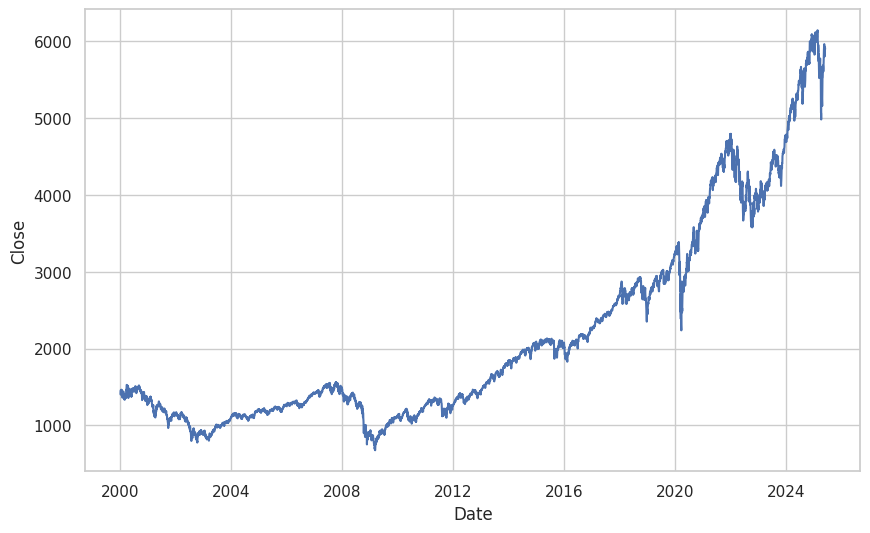

In [57]:
sns.lineplot(data=df, x=df.index, y=df['Close'], color='b');


In [58]:
fig = px.line(df, y='Close')

fig.update_layout(template="simple_white", font=dict(size=18),
                  title_text='Price SP500', width=650, title_x=0.5, height=400)

In [59]:
df.shape

(9280, 1)

In [60]:
# Calculate daily returns
sp500_returns = df['Close'].pct_change()

# Calculate descriptive statistics
mean_return = sp500_returns.mean()
median_return = sp500_returns.median()
std_dev = sp500_returns.std()

print("Mean daily return:", mean_return)
print("Median daily return:", median_return)
print("Standard deviation of daily returns:", std_dev)

Mean daily return: 0.0001943196666958197
Median daily return: 0.00026455008109871336
Standard deviation of daily returns: 0.009299533606449074


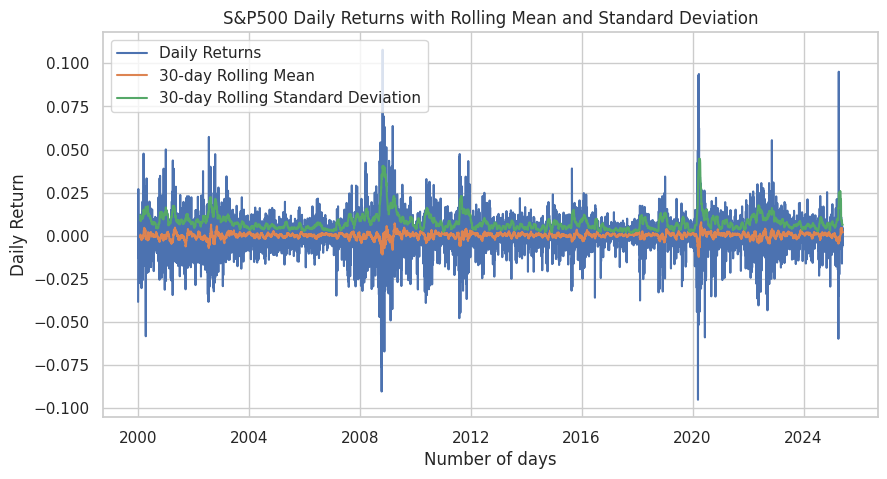

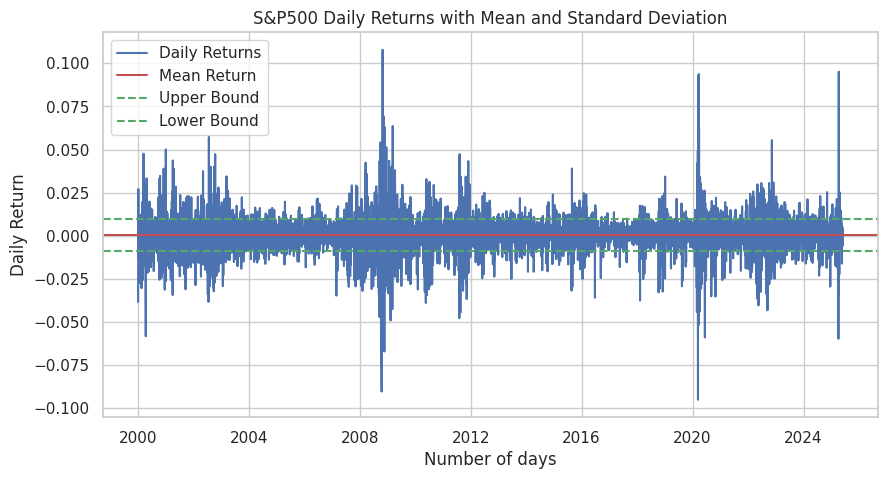

In [61]:
# Visualize rolling mean and standard deviation
window = 30
rolling_mean = sp500_returns.rolling(window=window).mean()
rolling_std_dev = sp500_returns.rolling(window=window).std()
plt.figure(figsize=(10,5))
plt.plot(sp500_returns.index, sp500_returns, label='Daily Returns')
plt.plot(rolling_mean.index, rolling_mean, label=f'{window}-day Rolling Mean')
plt.plot(rolling_std_dev.index, rolling_std_dev, label=f'{window}-day Rolling Standard Deviation')
plt.legend()
plt.title('S&P500 Daily Returns with Rolling Mean and Standard Deviation')
plt.xlabel('Number of days')
plt.ylabel('Daily Return')
plt.show()

# Visualize daily returns with mean and standard deviation
plt.figure(figsize=(10,5))
plt.plot(sp500_returns.index, sp500_returns, label='Daily Returns')
plt.axhline(y=mean_return, color='r', label='Mean Return')
plt.axhline(y=mean_return+std_dev, color='g', linestyle='--', label='Upper Bound')
plt.axhline(y=mean_return-std_dev, color='g', linestyle='--', label='Lower Bound')
plt.legend()
plt.title('S&P500 Daily Returns with Mean and Standard Deviation')
plt.xlabel('Number of days')
plt.ylabel('Daily Return')
plt.show()

In [62]:
#New table from wiki to see what sectors are in index
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = tables[0]
second_table = tables[1]


df_wiki = first_table
print(df_wiki.shape)
df_wiki["Symbol"] = df_wiki["Symbol"].map(lambda x: x.replace(".", "-"))
sp500_tickers = list(df_wiki["Symbol"])
df_wiki.head()

(503, 8)


Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989

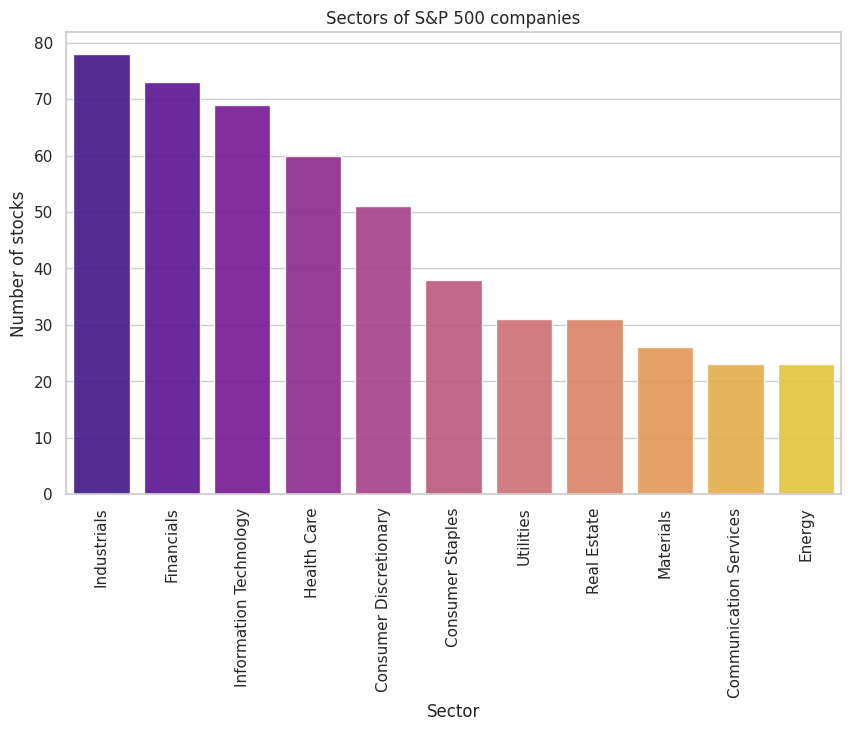

In [63]:
sector_count = df_wiki.groupby('GICS Sector')\
.agg({'Symbol':"count"})\
.sort_values('Symbol', ascending=False)\
.reset_index()

sns.barplot(data=sector_count,x='GICS Sector', y='Symbol',
               palette="plasma", alpha=0.9)
plt.xlabel("Sector")
plt.ylabel("Number of stocks")
plt.title("Sectors of S&P 500 companies")
plt.xticks(rotation=90);

# LOAD INDICATORS

In [64]:
!pip install fredapi -q

In [65]:
!pip install -q python-dotenv -q

In [66]:
from dotenv import load_dotenv
import os

# Завантаження змінних середовища з файлу .env
load_dotenv()

# Доступ до API ключа
api_key = os.getenv("FRED_API_KEY")

In [67]:
# from fredapi import Fred
# fred = Fred(api_key='')
# data = fred.get_series('SP500')

In [68]:
from fredapi import Fred

fred = Fred(api_key=api_key)

In [69]:
# Завантаження CPI
cpi_data = fred.get_series('CPIAUCSL', observation_start='2000-01-01')

# Завантаження рівня безробіття
unemployment_data = fred.get_series('UNRATE', observation_start='2000-01-01')

# Завантаження процентної ставки
interest_rate_data = fred.get_series('FEDFUNDS', observation_start='2000-01-01')

In [70]:
len(interest_rate_data)

305

In [71]:
interest_rate_data

2000-01-01    5.45
2000-02-01    5.73
2000-03-01    5.85
2000-04-01    6.02
2000-05-01    6.27
              ... 
2025-01-01    4.33
2025-02-01    4.33
2025-03-01    4.33
2025-04-01    4.33
2025-05-01    4.33
Length: 305, dtype: float64

In [72]:
# Список індикаторів з відповідними кодами FRED
indicators = {
    'CPI': 'CPIAUCSL',
    'Unemployment_Rate': 'UNRATE',
    'Interest_Rate': 'FEDFUNDS',
    '10-Year Treasuries': "DGS10",
    'GDP': 'GDP',
    'Industrial_Production': 'INDPRO',
    'Retail_Sales': 'RSAFS',
    'PMI': 'NAPM',  # ISM Manufacturing PMI
    'Consumer_Confidence': 'UMCSENT',
    'Housing_Starts': 'HOUST',
    'Trade_Balance': 'NETEXP',
    'Non_Farm_Payrolls': 'PAYEMS',
    'PPI': 'PPIACO',
    'Government_Debt': 'GFDEBTN',
    'Budget_Deficit': 'MTSDS133FMS'  # Monthly Treasury Statement Deficit
}

In [73]:
indicators = {
    'CPI': 'CPIAUCSL',
    'Core_CPI': 'CPILFESL',
    'PPI': 'PPIACO',
    'Core_PPI': 'PPIEFGS',
    'Unemployment_Rate': 'UNRATE',
    'Initial_Jobless_Claims': 'ICSA',
    'Non_Farm_Payrolls': 'PAYEMS',
    'Participation_Rate': 'CIVPART',
    'GDP': 'GDP',
    'GDP_Nowcast': 'GDPC1',
    'Retail_Sales': 'RSAFS',
    'Durable_Goods_Orders': 'DGORDER',
    'Industrial_Production': 'INDPRO',
    'Capacity_Utilization': 'TCU',
    'Consumer_Confidence': 'UMCSENT',
    'PMI': 'NAPM',
    'ISM_Services_Index': 'NAPMSI',
    'Housing_Starts': 'HOUST',
    'Building_Permits': 'PERMIT',
    'New_Home_Sales': 'HSN1F',
    'Existing_Home_Sales': 'EXHOSLUSM495S',
    'Interest_Rate': 'FEDFUNDS',
    '10-Year_Treasuries': 'DGS10',
    'Trade_Balance': 'NETEXP',
    'Government_Debt': 'GFDEBTN',
    'Budget_Deficit': 'MTSDS133FMS'
}

In [74]:
# Завантаження даних
economic_data = pd.DataFrame()
for name, code in indicators.items():
    try:
        series = fred.get_series(code, observation_start='2000-01-01')
        economic_data[name] = series
    except Exception as e:
        print(f"Не вдалося завантажити {name}: {e}")

Не вдалося завантажити Core_PPI: Bad Request.  The series does not exist.
Не вдалося завантажити PMI: Bad Request.  The series does not exist.
Не вдалося завантажити ISM_Services_Index: Bad Request.  The series does not exist.


In [75]:
economic_data

CPI  Core_CPI      PPI  Unemployment_Rate  \
2000-01-01  169.300   179.300  128.300                4.0   
2000-02-01  170.000   179.400  129.800                4.1   
2000-03-01  171.000   180.000  130.800                4.0   
2000-04-01  170.900   180.300  130.700                3.8   
2000-05-01  171.200   180.700  131.600                4.0   
...             ...       ...      ...                ...   
2024-12-01  317.603   323.296  253.423                4.1   
2025-01-01  319.086   324.739  257.376                4.0   
2025-02-01  319.775   325.475  259.581                4.1   
2025-03-01  319.615   325.659  258.711                4.2   
2025-04-01  320.321   326.430  258.712                4.2   

            Initial_Jobless_Claims  Non_Farm_Payrolls  Participation_Rate  \
2000-01-01                286000.0           131011.0                67.3   
2000-02-01                     NaN           131121.0                67.3   
2000-03-01                     NaN           131604.0                67.3   
2000-04-01                266000.0           131883.0                67.3   
2000-05-01                     NaN           132105.0                67.1   
...                            ...                ...                 ...   
2024-12-01                     NaN           158942.0                62.5   
2025-01-01                     NaN           159053.0                62.6   
2025-02-01                222000.0           159155.0                62.4   
2025-03-01                224000.0           159340.0                62.5   
2025-04-01                     NaN           159517.0                62.6   

                  GDP  GDP_Nowcast  Retail_Sales  ...  Consumer_Confidence  \
2000-01-01  10002.179    13878.147      261545.0  ...                112.0   
2000-02-01        NaN          NaN      265686.0  ...                111.3   
2000-03-01        NaN          NaN      269019.0  ...                107.1   
2000-04-01  10247.720    14130.908      264067.0  ...                109.2   
2000-05-01        NaN          NaN      265992.0  ...                110.7   
...               ...          ...           ...  ...                  ...   
2024-12-01        NaN          NaN      717662.0  ...                 74.0   
2025-01-01  29976.638    23528.047      711461.0  ...                 71.7   
2025-02-01        NaN          NaN      711757.0  ...                 64.7   
2025-03-01        NaN          NaN      723714.0  ...                 57.0   
2025-04-01        NaN          NaN      724131.0  ...                 52.2   

            Housing_Starts  Building_Permits  New_Home_Sales  \
2000-01-01          1636.0            1727.0           873.0   
2000-02-01          1737.0            1692.0           856.0   
2000-03-01          1604.0            1651.0           900.0   
2000-04-01          1626.0            1597.0           841.0   
2000-05-01          1575.0            1543.0           857.0   
...                    ...               ...             ...   
2024-12-01          1514.0            1480.0           718.0   
2025-01-01          1358.0            1460.0           662.0   
2025-02-01          1490.0            1454.0           653.0   
2025-03-01          1339.0            1481.0           670.0   
2025-04-01          1361.0            1422.0           743.0   

            Existing_Home_Sales  Interest_Rate  10-Year_Treasuries  \
2000-01-01                  NaN           5.45                 NaN   
2000-02-01                  NaN           5.73                6.62   
2000-03-01                  NaN           5.85                6.39   
2000-04-01                  NaN           6.02                 NaN   
2000-05-01                  NaN           6.27                6.29   
...                         ...            ...                 ...   
2024-12-01            4290000.0           4.48                 NaN   
2025-01-01            4090000.0           4.33                 NaN   
2025-02-01            

In [76]:
economic_data.shape

(304, 23)

In [77]:
# Перетворення індексу в datetime
economic_data.index = pd.to_datetime(economic_data.index)

# Переводимо всі серії до місячної частоти
economic_data = economic_data.resample('MS').ffill()
# economic_data = economic_data.asfreq('MS')

In [78]:
df

Close
Date                   
2000-01-03  1455.219971
2000-01-04  1399.420044
2000-01-05  1402.109985
2000-01-06  1403.449951
2000-01-07  1441.469971
...                 ...
2025-05-26  5891.859985
2025-05-27  5921.540039
2025-05-28  5888.549805
2025-05-29  5912.169922
2025-05-30  5911.689941

[9280 rows x 1 columns]

In [79]:
sp500 = df[['Close']]  # таблиця sp500 з колонкою Close
sp500 = sp500.resample('MS').ffill()
# sp500 = sp500.asfreq('MS')

In [80]:
sp500.shape

(305, 1)

In [81]:
# Об'єднання
full_df = sp500.merge(economic_data, left_index=True, right_index=True)

# Очистка
# full_df.dropna(inplace=True)

In [82]:
full_df.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01',
               '2025-03-01', '2025-04-01'],
              dtype='datetime64[ns]', length=304, freq='MS')

In [83]:
full_df.shape #без full_df.dropna(inplace=True) маємо 303 рядка, якщо видаляємо NaN, то (51,15)

(304, 24)

In [84]:
full_df.head()

Close    CPI  Core_CPI    PPI  Unemployment_Rate  \
2000-01-01          NaN  169.3     179.3  128.3                4.0   
2000-02-01  1409.280029  170.0     179.4  129.8                4.1   
2000-03-01  1379.189941  171.0     180.0  130.8                4.0   
2000-04-01  1501.043294  170.9     180.3  130.7                3.8   
2000-05-01  1468.250000  171.2     180.7  131.6                4.0   

            Initial_Jobless_Claims  Non_Farm_Payrolls  Participation_Rate  \
2000-01-01                286000.0           131011.0                67.3   
2000-02-01                     NaN           131121.0                67.3   
2000-03-01                     NaN           131604.0                67.3   
2000-04-01                266000.0           131883.0                67.3   
2000-05-01                     NaN           132105.0                67.1   

                  GDP  GDP_Nowcast  ...  Consumer_Confidence  Housing_Starts  \
2000-01-01  10002.179    13878.147  ...                112.0          1636.0   
2000-02-01        NaN          NaN  ...                111.3          1737.0   
2000-03-01        NaN          NaN  ...                107.1          1604.0   
2000-04-01  10247.720    14130.908  ...                109.2          1626.0   
2000-05-01        NaN          NaN  ...                110.7          1575.0   

            Building_Permits  New_Home_Sales  Existing_Home_Sales  \
2000-01-01            1727.0           873.0                  NaN   
2000-02-01            1692.0           856.0                  NaN   
2000-03-01            1651.0           900.0                  NaN   
2000-04-01            1597.0           841.0                  NaN   
2000-05-01            1543.0           857.0                  NaN   

            Interest_Rate  10-Year_Treasuries  Trade_Balance  Government_Debt  \
2000-01-01           5.45                 NaN       -356.583        5773392.0   
2000-02-01           5.73                6.62            NaN              NaN   
2000-03-01           5.85                6.39            NaN              NaN   
2000-04-01           6.02                 NaN       -362.501        5685938.0   
2000-05-01           6.27                6.29            NaN              NaN   

            Budget_Deficit  
2000-01-01         62152.0  
2000-02-01        -41734.0  
2000-03-01        -35380.0  
2000-04-01        159497.0  
2000-05-01         -3611.0  

[5 rows x 24 columns]

In [85]:
full_df.tail()

Close      CPI  Core_CPI      PPI  Unemployment_Rate  \
2024-12-01  6042.226562  317.603   323.296  253.423                4.1   
2025-01-01  5875.089844  319.086   324.739  257.376                4.0   
2025-02-01  6025.209798  319.775   325.475  259.581                4.1   
2025-03-01  5919.573405  319.615   325.659  258.711                4.2   
2025-04-01  5633.069824  320.321   326.430  258.712                4.2   

            Initial_Jobless_Claims  Non_Farm_Payrolls  Participation_Rate  \
2024-12-01                     NaN           158942.0                62.5   
2025-01-01                     NaN           159053.0                62.6   
2025-02-01                222000.0           159155.0                62.4   
2025-03-01                224000.0           159340.0                62.5   
2025-04-01                     NaN           159517.0                62.6   

                  GDP  GDP_Nowcast  ...  Consumer_Confidence  Housing_Starts  \
2024-12-01        NaN          NaN  ...                 74.0          1514.0   
2025-01-01  29976.638    23528.047  ...                 71.7          1358.0   
2025-02-01        NaN          NaN  ...                 64.7          1490.0   
2025-03-01        NaN          NaN  ...                 57.0          1339.0   
2025-04-01        NaN          NaN  ...                 52.2          1361.0   

            Building_Permits  New_Home_Sales  Existing_Home_Sales  \
2024-12-01            1480.0           718.0            4290000.0   
2025-01-01            1460.0           662.0            4090000.0   
2025-02-01            1454.0           653.0            4270000.0   
2025-03-01            1481.0           670.0            4020000.0   
2025-04-01            1422.0           743.0            4000000.0   

            Interest_Rate  10-Year_Treasuries  Trade_Balance  Government_Debt  \
2024-12-01           4.48                 NaN            NaN              NaN   
2025-01-01           4.33                 NaN      -1267.561       36214310.0   
2025-02-01           4.33                 NaN            NaN              NaN   
2025-03-01           4.33                 NaN            NaN              NaN   
2025-04-01           4.33                4.17            NaN              NaN   

            Budget_Deficit  
2024-12-01   -86731.619013  
2025-01-01  -128640.206673  
2025-02-01  -307017.194699  
2025-03-01  -160530.321499  
2025-04-01   258399.949115  

[5 rows x 24 columns]

In [86]:
# Подивитись кількість пропусків після resample
# nulls = pd.concat([sp500, economic_data], axis=1).isna().sum().sort_values(ascending=False)
nulls = full_df.isna().sum().sort_values(ascending=False)

print(nulls)

Existing_Home_Sales       291
Initial_Jobless_Claims    259
GDP                       203
Trade_Balance             203
GDP_Nowcast               203
Government_Debt           203
10-Year_Treasuries        109
Close                       1
Participation_Rate          0
Non_Farm_Payrolls           0
Unemployment_Rate           0
PPI                         0
CPI                         0
Core_CPI                    0
Retail_Sales                0
Durable_Goods_Orders        0
Housing_Starts              0
Consumer_Confidence         0
Capacity_Utilization        0
Industrial_Production       0
Interest_Rate               0
New_Home_Sales              0
Building_Permits            0
Budget_Deficit              0
dtype: int64


Бачимо, що дійсно маємо справу з різночастотними часовими рядами.


GDP, Trade_Balance, Government_Debt і частково Budget_Deficit — оновлюються раз у квартал або ще рідше.

У кожного джерела — різна частота:

S&P 500 — щодня.

CPI, Interest Rate — раз на місяць.

GDP — раз на квартал.

Треба обрати одну практичну стратегію далі:


✅ Рішення 1: Залишити рідкі фічі, але зробити ffill() вже після об’єднання

⚠️ У моделі обов'язково вкажемо, що певні фічі були "last known value" — бо це логічно у макроекономіці: GDP не змінюється щомісяця, але його останнє значення актуальне.

Оскільки макроекономічні показники оновлюються щомісяця або щокварталу, форвардне заповнення було використано для поширення останнього відомого значення. Це поширена практика в економічному прогнозуванні, яка відображає припущення, що учасники ринку покладаються на останні опубліковані дані.

In [87]:
full_df = full_df.ffill()  # або ffill(limit=6) — якщо не хочеш тягнути безкінечно

print(full_df.shape)  # ≈ 300+ рядків, з усіма фічами

(304, 24)


In [88]:
full_df

Close      CPI  Core_CPI      PPI  Unemployment_Rate  \
2000-01-01          NaN  169.300   179.300  128.300                4.0   
2000-02-01  1409.280029  170.000   179.400  129.800                4.1   
2000-03-01  1379.189941  171.000   180.000  130.800                4.0   
2000-04-01  1501.043294  170.900   180.300  130.700                3.8   
2000-05-01  1468.250000  171.200   180.700  131.600                4.0   
...                 ...      ...       ...      ...                ...   
2024-12-01  6042.226562  317.603   323.296  253.423                4.1   
2025-01-01  5875.089844  319.086   324.739  257.376                4.0   
2025-02-01  6025.209798  319.775   325.475  259.581                4.1   
2025-03-01  5919.573405  319.615   325.659  258.711                4.2   
2025-04-01  5633.069824  320.321   326.430  258.712                4.2   

            Initial_Jobless_Claims  Non_Farm_Payrolls  Participation_Rate  \
2000-01-01                286000.0           131011.0                67.3   
2000-02-01                286000.0           131121.0                67.3   
2000-03-01                286000.0           131604.0                67.3   
2000-04-01                266000.0           131883.0                67.3   
2000-05-01                266000.0           132105.0                67.1   
...                            ...                ...                 ...   
2024-12-01                229000.0           158942.0                62.5   
2025-01-01                229000.0           159053.0                62.6   
2025-02-01                222000.0           159155.0                62.4   
2025-03-01                224000.0           159340.0                62.5   
2025-04-01                224000.0           159517.0                62.6   

                  GDP  GDP_Nowcast  ...  Consumer_Confidence  Housing_Starts  \
2000-01-01  10002.179    13878.147  ...                112.0          1636.0   
2000-02-01  10002.179    13878.147  ...                111.3          1737.0   
2000-03-01  10002.179    13878.147  ...                107.1          1604.0   
2000-04-01  10247.720    14130.908  ...                109.2          1626.0   
2000-05-01  10247.720    14130.908  ...                110.7          1575.0   
...               ...          ...  ...                  ...             ...   
2024-12-01  29723.864    23542.349  ...                 74.0          1514.0   
2025-01-01  29976.638    23528.047  ...                 71.7          1358.0   
2025-02-01  29976.638    23528.047  ...                 64.7          1490.0   
2025-03-01  29976.638    23528.047  ...                 57.0          1339.0   
2025-04-01  29976.638    23528.047  ...                 52.2          1361.0   

            Building_Permits  New_Home_Sales  Existing_Home_Sales  \
2000-01-01            1727.0           873.0                  NaN   
2000-02-01            1692.0           856.0                  NaN   
2000-03-01            1651.0           900.0                  NaN   
2000-04-01            1597.0           841.0                  NaN   
2000-05-01            1543.0           857.0                  NaN   
...                      ...             ...                  ...   
2024-12-01            1480.0           718.0            4290000.0   
2025-01-01            1460.0           662.0            4090000.0   
2025-02-01            1454.0           653.0            4270000.0   
2025-03-01            1481.0           670.0            4020000.0   
2025-04-01            1422.0           743.0            4000000.0   

            Interest_Rate  10-Year_Treasuries  Trade_Balance  Government_Debt  \
2000-01-01           5.45                 NaN       -356.583        5773392.0   
2000-02-01           5.73                6.62       -356.583        5773392.0   
2000-03-01           5.85                6.39       -356.583        5773392.0   
2000-04-01           6.02                6.39       -362.501        5685938.0   
2000-05-0

In [89]:
full_df.isna().sum()

Close                       1
CPI                         0
Core_CPI                    0
PPI                         0
Unemployment_Rate           0
Initial_Jobless_Claims      0
Non_Farm_Payrolls           0
Participation_Rate          0
GDP                         0
GDP_Nowcast                 0
Retail_Sales                0
Durable_Goods_Orders        0
Industrial_Production       0
Capacity_Utilization        0
Consumer_Confidence         0
Housing_Starts              0
Building_Permits            0
New_Home_Sales              0
Existing_Home_Sales       291
Interest_Rate               0
10-Year_Treasuries          1
Trade_Balance               0
Government_Debt             0
Budget_Deficit              0
dtype: int64

In [90]:
full_df.drop(columns='Existing_Home_Sales', inplace=True)

In [91]:
full_df.isna().sum()

Close                     1
CPI                       0
Core_CPI                  0
PPI                       0
Unemployment_Rate         0
Initial_Jobless_Claims    0
Non_Farm_Payrolls         0
Participation_Rate        0
GDP                       0
GDP_Nowcast               0
Retail_Sales              0
Durable_Goods_Orders      0
Industrial_Production     0
Capacity_Utilization      0
Consumer_Confidence       0
Housing_Starts            0
Building_Permits          0
New_Home_Sales            0
Interest_Rate             0
10-Year_Treasuries        1
Trade_Balance             0
Government_Debt           0
Budget_Deficit            0
dtype: int64

✅ Рішення 2: Розділи фічі на "часті" і "рідкі"

🔹 Часті фічі (залишаємо для основної моделі):
CPI, Unemployment_Rate, Interest_Rate, Consumer_Confidence, Retail_Sales, PPI, Industrial_Production, Housing_Starts, Non_Farm_Payrolls, Budget_Deficit

🔹 Рідкі фічі (можна окремо аналізувати або лагувати на довгі періоди):
GDP, Trade_Balance, Government_Debt, 10-Year Treasuries

In [92]:
core_features = [
    'CPI', 'Unemployment_Rate', 'Interest_Rate',
    'Consumer_Confidence', 'Retail_Sales',
    'PPI', 'Industrial_Production',
    'Housing_Starts', 'Non_Farm_Payrolls', 'Budget_Deficit'
]

economic_core = economic_data[core_features]
full_df_core = sp500.merge(economic_core, left_index=True, right_index=True)
full_df_core.dropna(inplace=True)

print(full_df_core.shape)

(303, 11)


In [93]:
full_df_core

Close      CPI  Unemployment_Rate  Interest_Rate  \
2000-02-01  1409.280029  170.000                4.1           5.73   
2000-03-01  1379.189941  171.000                4.0           5.85   
2000-04-01  1501.043294  170.900                3.8           6.02   
2000-05-01  1468.250000  171.200                4.0           6.27   
2000-06-01  1448.810059  172.200                4.0           6.53   
...                 ...      ...                ...            ...   
2024-12-01  6042.226562  317.603                4.1           4.48   
2025-01-01  5875.089844  319.086                4.0           4.33   
2025-02-01  6025.209798  319.775                4.1           4.33   
2025-03-01  5919.573405  319.615                4.2           4.33   
2025-04-01  5633.069824  320.321                4.2           4.33   

            Consumer_Confidence  Retail_Sales      PPI  Industrial_Production  \
2000-02-01                111.3      265686.0  129.800                91.7245   
2000-03-01                107.1      269019.0  130.800                92.0830   
2000-04-01                109.2      264067.0  130.700                92.6659   
2000-05-01                110.7      265992.0  131.600                92.9347   
2000-06-01                106.4      267750.0  133.800                93.0018   
...                         ...           ...      ...                    ...   
2024-12-01                 74.0      717662.0  253.423               103.0723   
2025-01-01                 71.7      711461.0  257.376               103.2131   
2025-02-01                 64.7      711757.0  259.581               104.1490   
2025-03-01                 57.0      723714.0  258.711               103.8865   
2025-04-01                 52.2      724131.0  258.712               103.8799   

            Housing_Starts  Non_Farm_Payrolls  Budget_Deficit  
2000-02-01          1737.0           131121.0   -41734.000000  
2000-03-01          1604.0           131604.0   -35380.000000  
2000-04-01          1626.0           131883.0   159497.000000  
2000-05-01          1575.0           132105.0    -3611.000000  
2000-06-01          1559.0           132062.0    55888.000000  
...                    ...                ...             ...  
2024-12-01          1514.0           158942.0   -86731.619013  
2025-01-01          1358.0           159053.0  -128640.206673  
2025-02-01          1490.0           159155.0  -307017.194699  
2025-03-01          1339.0           159340.0  -160530.321499  
2025-04-01          1361.0           159517.0   258399.949115  

[303 rows x 11 columns]

Обираємо варіант 1, другий варіант залишаємо в рекомендації, пропозиції

#CORRELATION

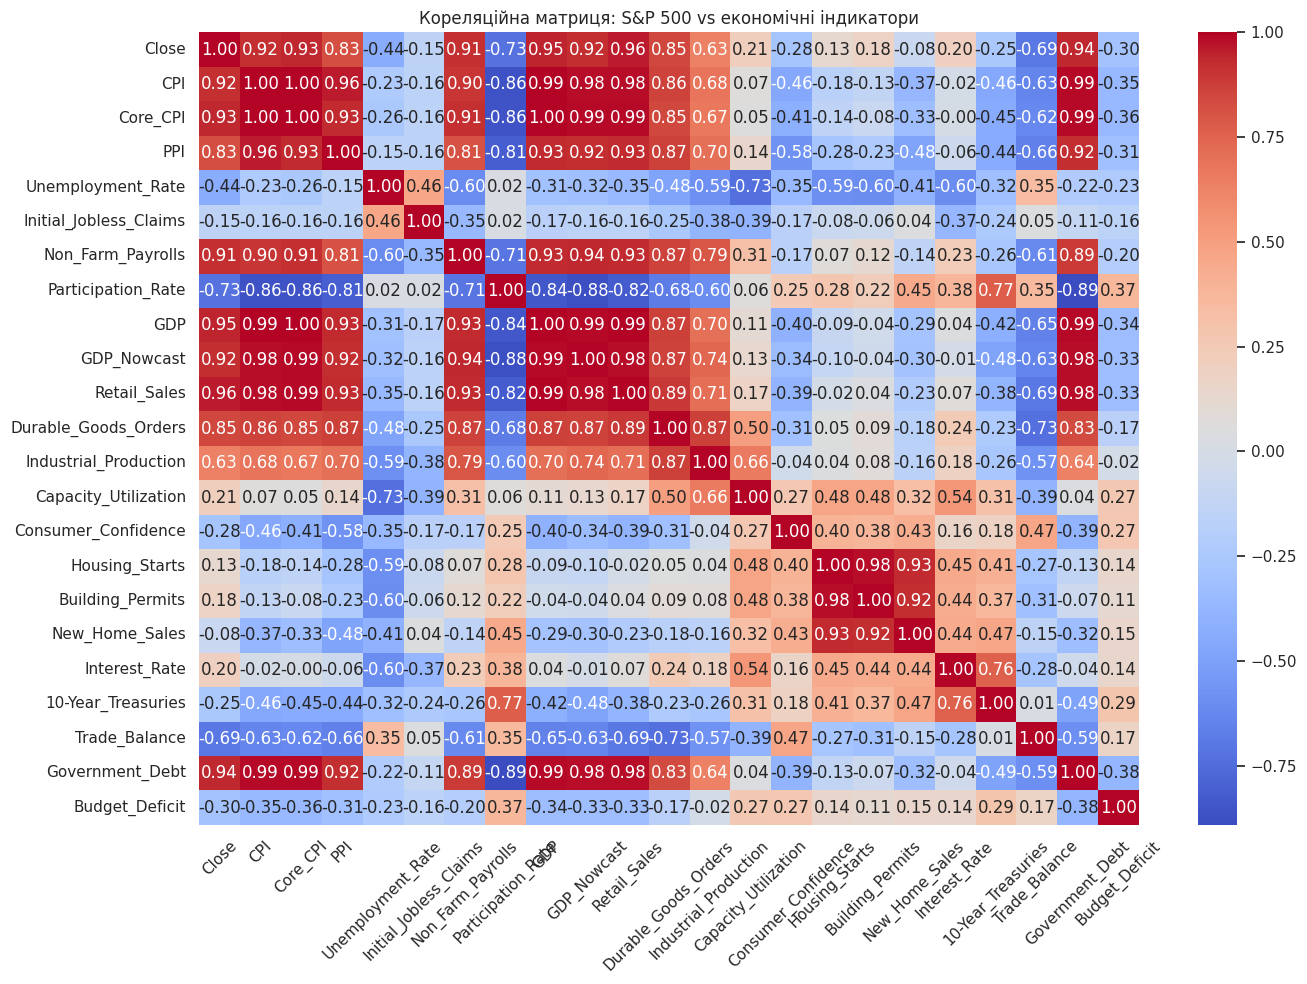

In [94]:
# Побудова кореляційної матриці
plt.figure(figsize=(14, 10))
sns.heatmap(full_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця: S&P 500 vs економічні індикатори")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

✅ Порахувати кореляцію тільки з S&P 500 (колонка Close) і відсортувати. Побудувати графік

In [95]:
# Розрахунок кореляції лише з колонкою 'Close'
correlations = full_df.corr()['Close'].drop('Close').sort_values(ascending=False)

# Виведемо топ-5
print("Топ-10 ознак, що найбільше корелюють з S&P 500:")
print(correlations.head(10))


Топ-10 ознак, що найбільше корелюють з S&P 500:
Retail_Sales             0.960607
GDP                      0.946352
Government_Debt          0.936878
Core_CPI                 0.933702
GDP_Nowcast              0.924910
CPI                      0.915945
Non_Farm_Payrolls        0.913967
Durable_Goods_Orders     0.851248
PPI                      0.826069
Industrial_Production    0.632022
Name: Close, dtype: float64


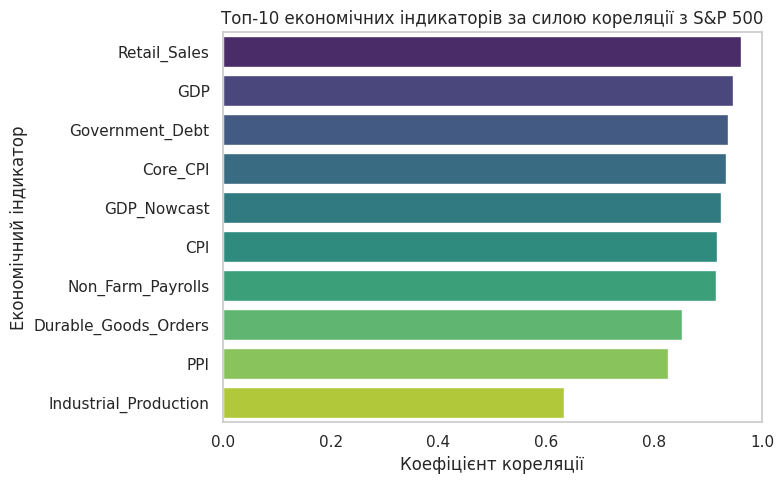

In [96]:
# Побудова бар-чарту #1
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.head(10).values, y=correlations.head(10).index, palette='viridis')
plt.title('Топ-10 економічних індикаторів за силою кореляції з S&P 500')
plt.xlabel('Коефіцієнт кореляції')
plt.ylabel('Економічний індикатор')
plt.xlim(0, 1)  # якщо всі значення позитивні
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [97]:
# Розрахунок кореляції лише з колонкою 'Close'
correlations_negative = full_df.corr()['Close'].drop('Close').sort_values(ascending=True)

# Виведемо топ-5
print("Топ-5 ознак, що найбільш негативно корелюють з S&P 500:")
print(correlations_negative.head(5))

Топ-5 ознак, що найбільш негативно корелюють з S&P 500:
Participation_Rate    -0.728807
Trade_Balance         -0.692662
Unemployment_Rate     -0.437427
Budget_Deficit        -0.298145
Consumer_Confidence   -0.278967
Name: Close, dtype: float64


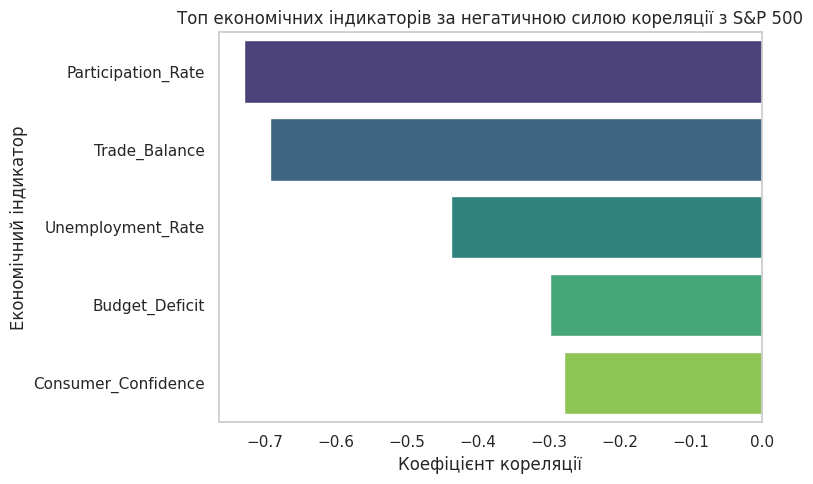

In [98]:
# Побудова бар-чарту #2
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations_negative.head().values, y=correlations_negative.head().index, palette='viridis')
plt.title('Топ економічних індикаторів за негатичною силою кореляції з S&P 500')
plt.xlabel('Коефіцієнт кореляції')
plt.ylabel('Економічний індикатор')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Своримо новий датафрейм, який містить Close (S&P 500) та обрані, найбільш корелюючі, ознаки

In [105]:
# Вказуємо назви потрібних ознак
selected_features = [
    'Close',
    'Retail_Sales',
    'GDP',
    'Government_Debt',
    'Core_CPI',
    'GDP_Nowcast',
    'CPI',
    'Non_Farm_Payrolls',
    'Durable_Goods_Orders',
    'PPI',
    'Industrial_Production',
    'Participation_Rate',
    'Trade_Balance',
    'Unemployment_Rate',
    'Budget_Deficit',
    'Consumer_Confidence',
    'Interest_Rate'
]


# Створюємо новий датафрейм з цими ознаками
df_features = full_df[selected_features].copy()

# Перевіримо результат
df_features.head()

Close  Retail_Sales        GDP  Government_Debt  Core_CPI  \
2000-01-01          NaN      261545.0  10002.179        5773392.0     179.3   
2000-02-01  1409.280029      265686.0  10002.179        5773392.0     179.4   
2000-03-01  1379.189941      269019.0  10002.179        5773392.0     180.0   
2000-04-01  1501.043294      264067.0  10247.720        5685938.0     180.3   
2000-05-01  1468.250000      265992.0  10247.720        5685938.0     180.7   

            GDP_Nowcast    CPI  Non_Farm_Payrolls  Durable_Goods_Orders  \
2000-01-01    13878.147  169.3           131011.0              201360.0   
2000-02-01    13878.147  170.0           131121.0              183911.0   
2000-03-01    13878.147  171.0           131604.0              192130.0   
2000-04-01    14130.908  170.9           131883.0              195044.0   
2000-05-01    14130.908  171.2           132105.0              188606.0   

              PPI  Industrial_Production  Participation_Rate  Trade_Balance  \
2000-01-01  128.3                91.4092                67.3       -356.583   
2000-02-01  129.8                91.7245                67.3       -356.583   
2000-03-01  130.8                92.0830                67.3       -356.583   
2000-04-01  130.7                92.6659                67.3       -362.501   
2000-05-01  131.6                92.9347                67.1       -362.501   

            Unemployment_Rate  Budget_Deficit  Consumer_Confidence  \
2000-01-01                4.0         62152.0                112.0   
2000-02-01                4.1        -41734.0                111.3   
2000-03-01                4.0        -35380.0                107.1   
2000-04-01                3.8        159497.0                109.2   
2000-05-01                4.0         -3611.0                110.7   

            Interest_Rate  
2000-01-01           5.45  
2000-02-01           5.73  
2000-03-01           5.85  
2000-04-01           6.02  
2000-05-01           6.27

In [106]:
df_features.shape

(304, 17)

Візуалізуємо для порівняння на одному графіку S&P500 з кожним індикатором для оцінки взаєповлипу

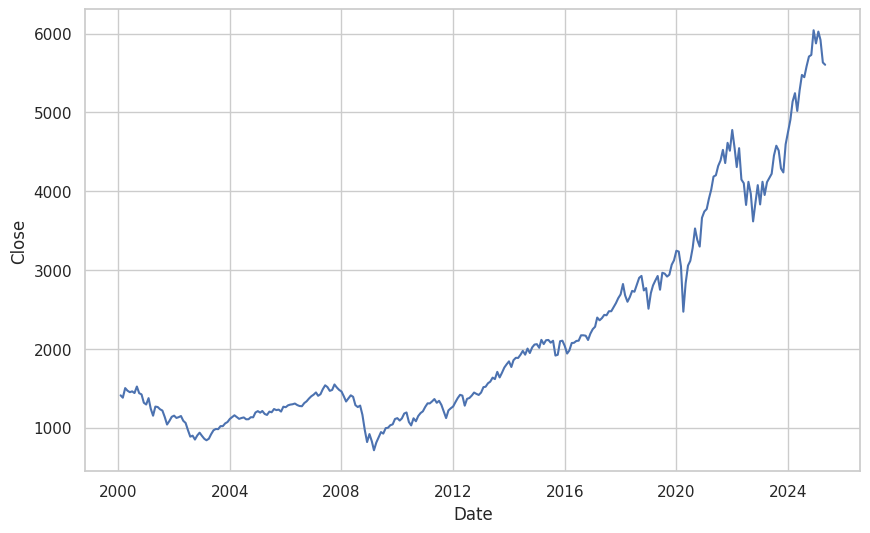

In [107]:
sns.lineplot(data=sp500, x=sp500.index, y=sp500['Close'], color='b');

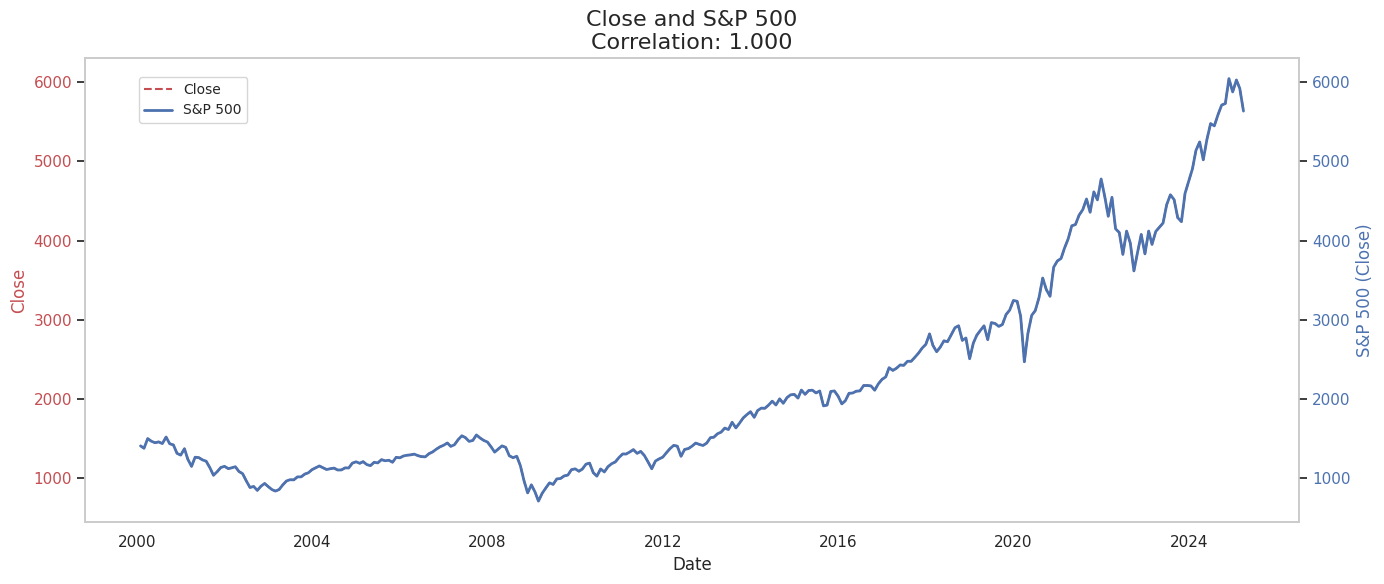

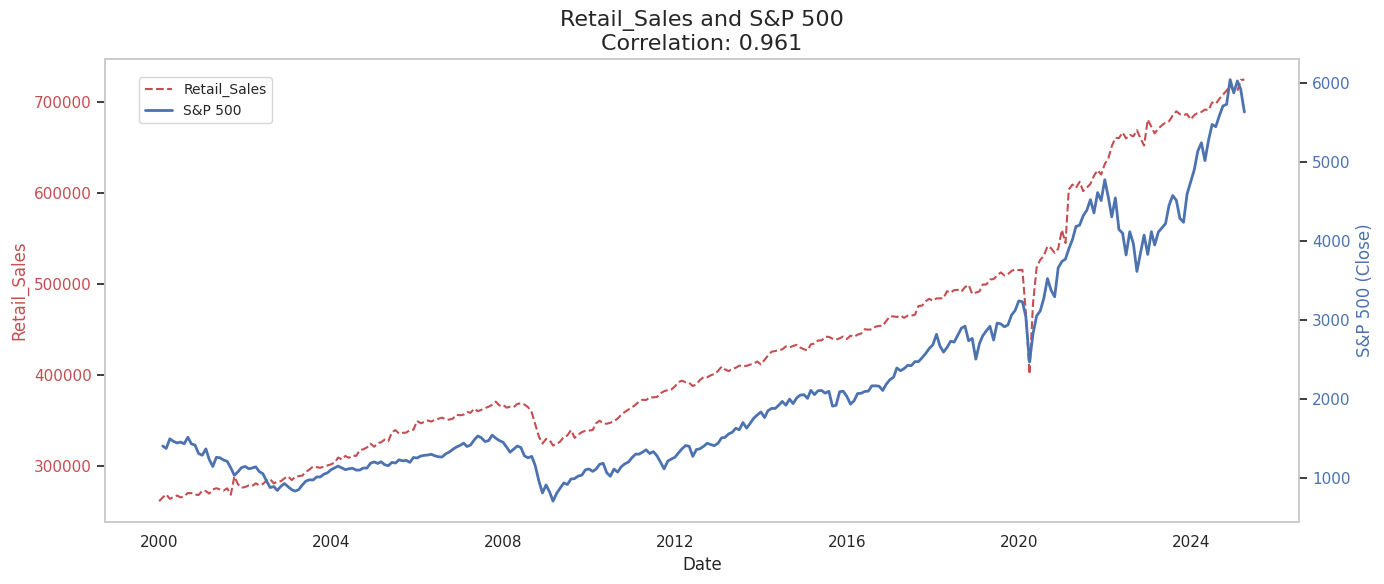

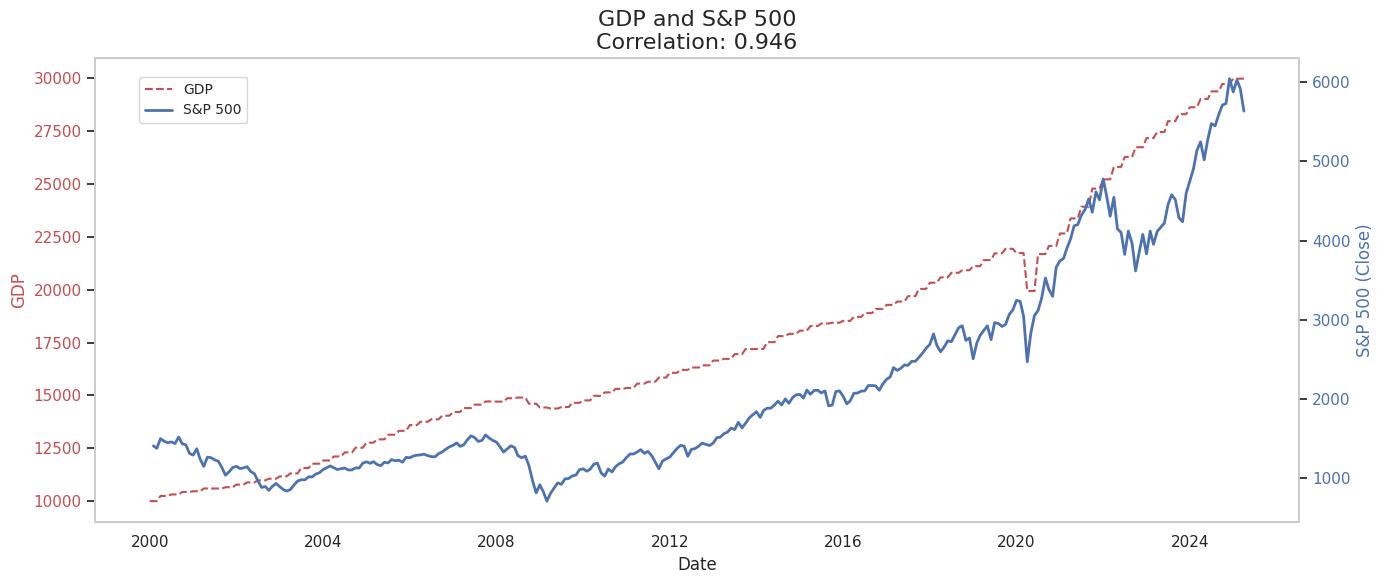

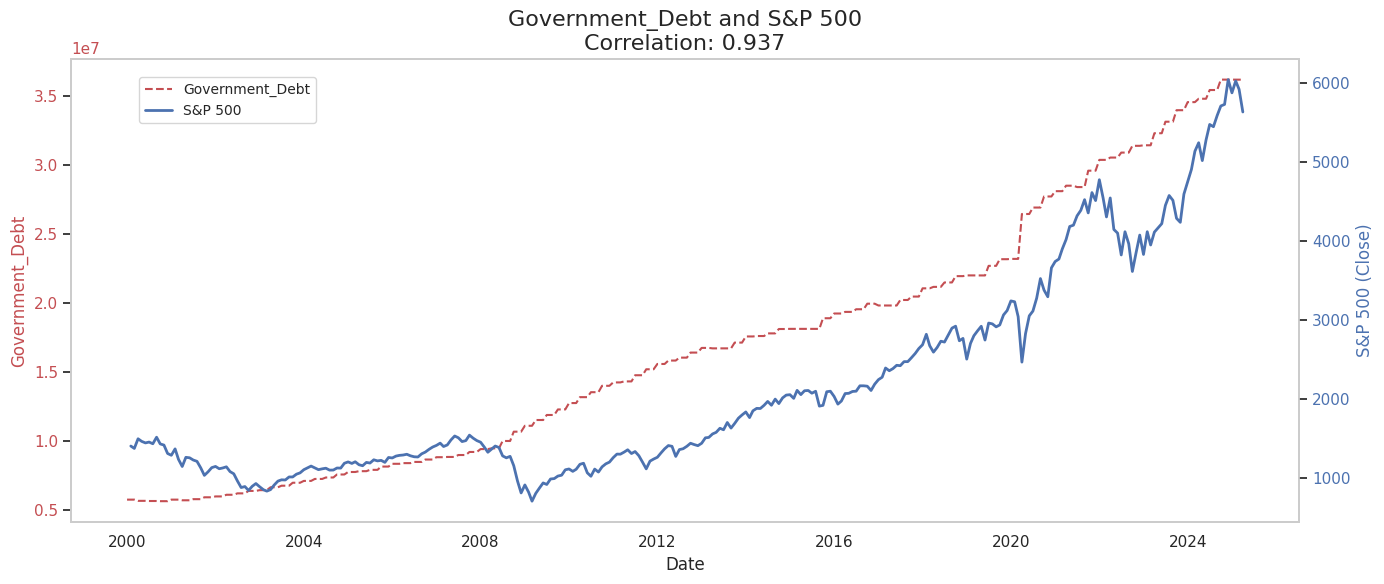

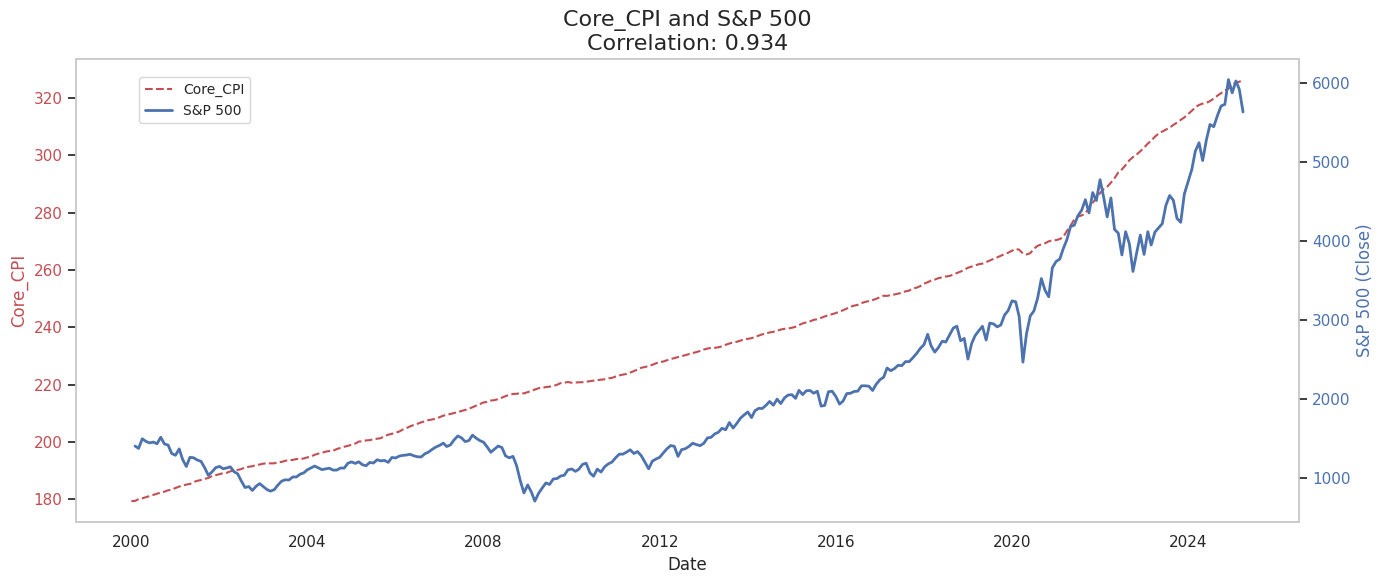

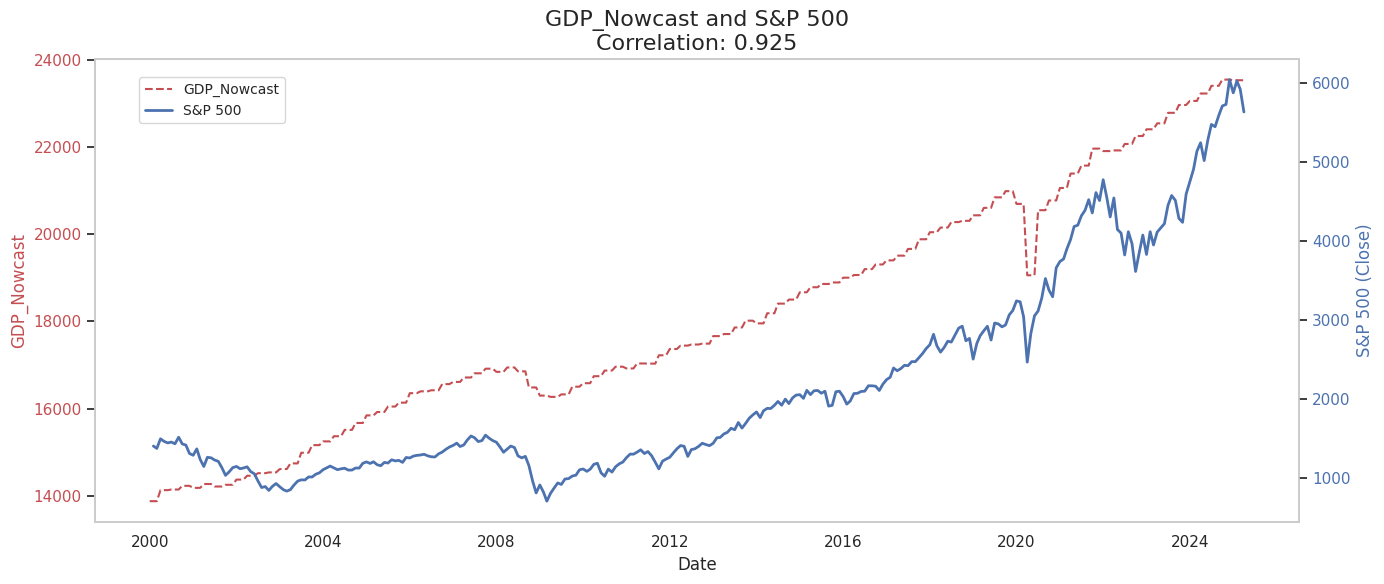

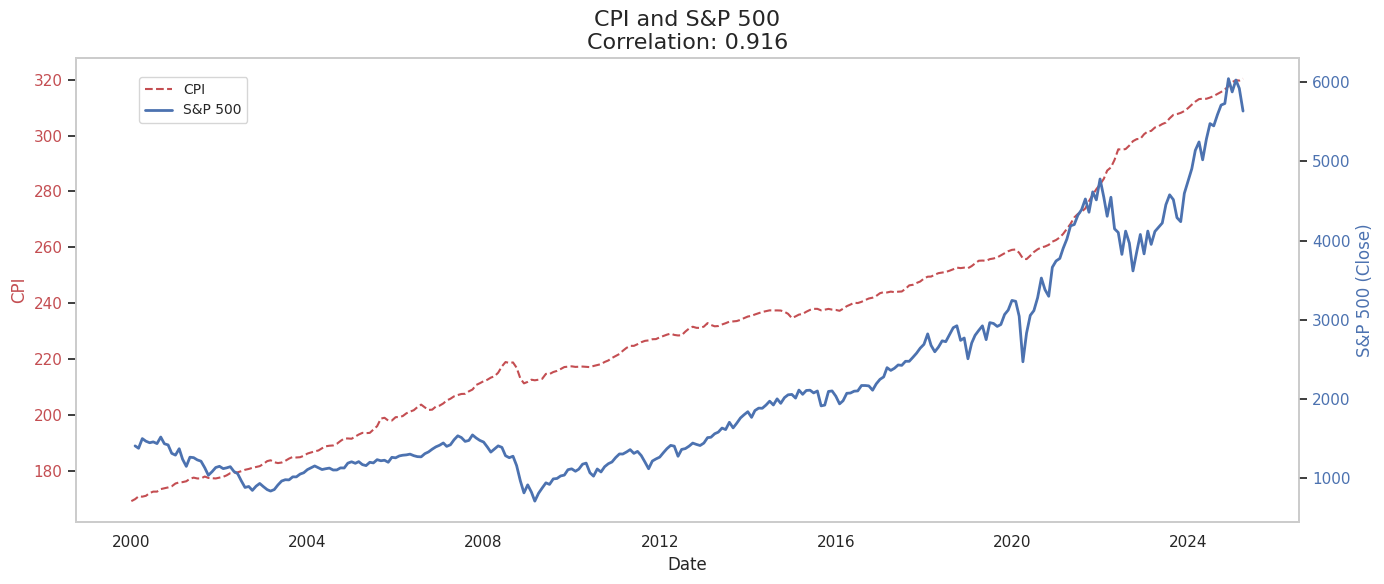

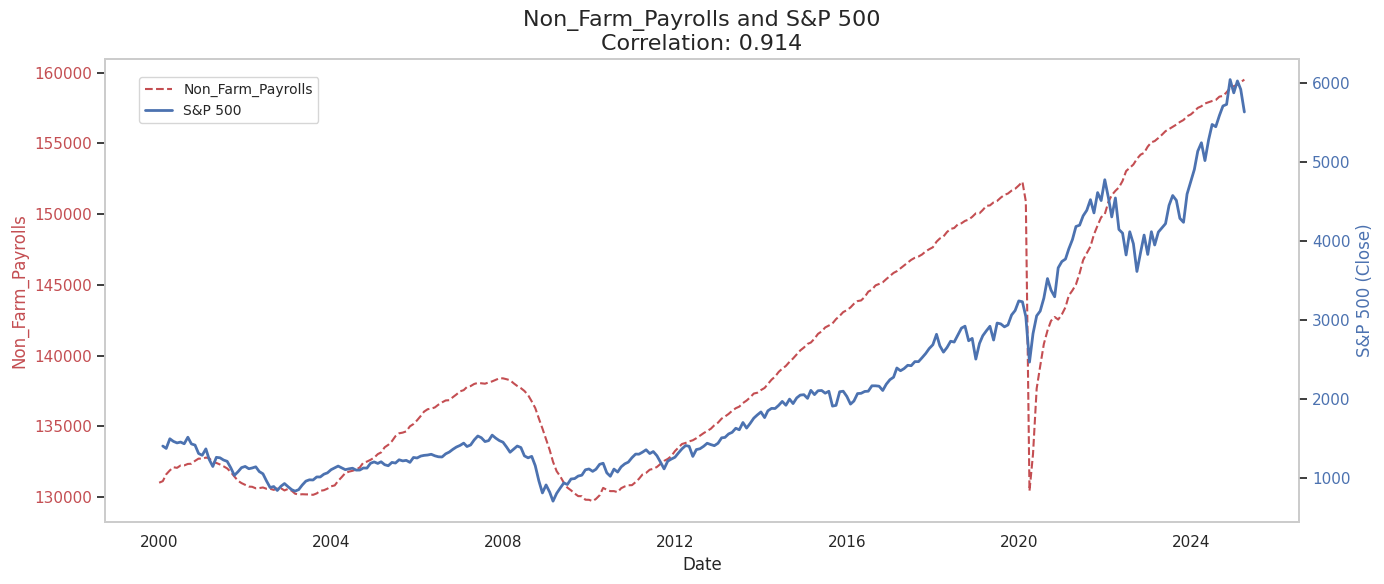

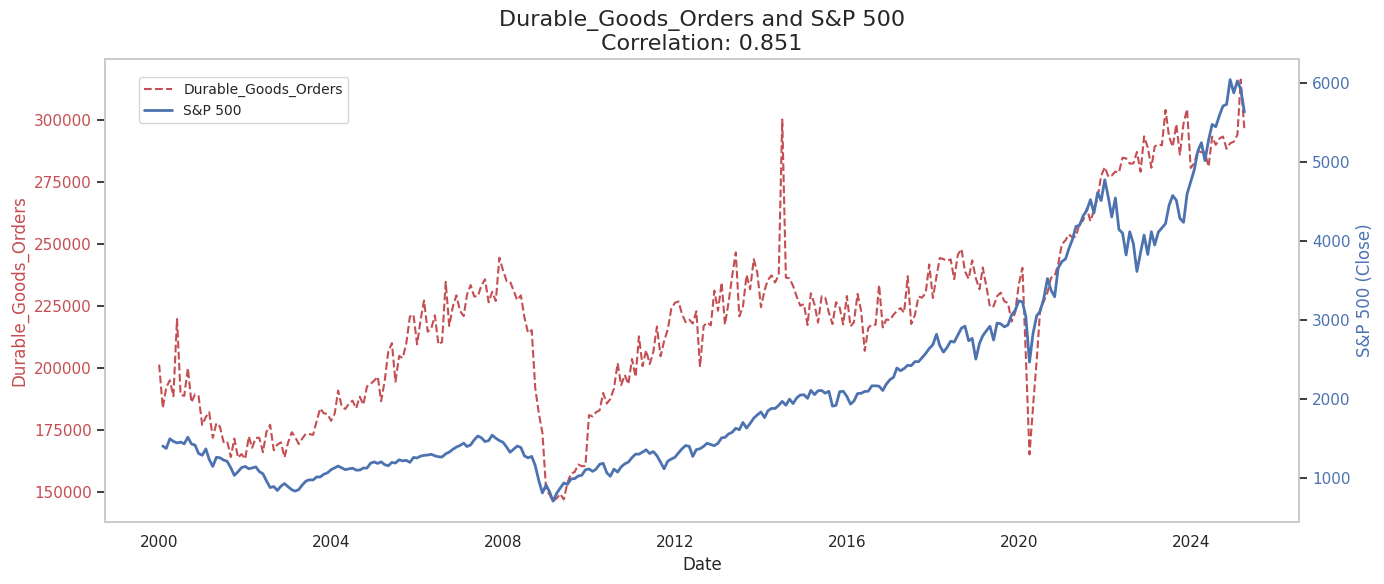

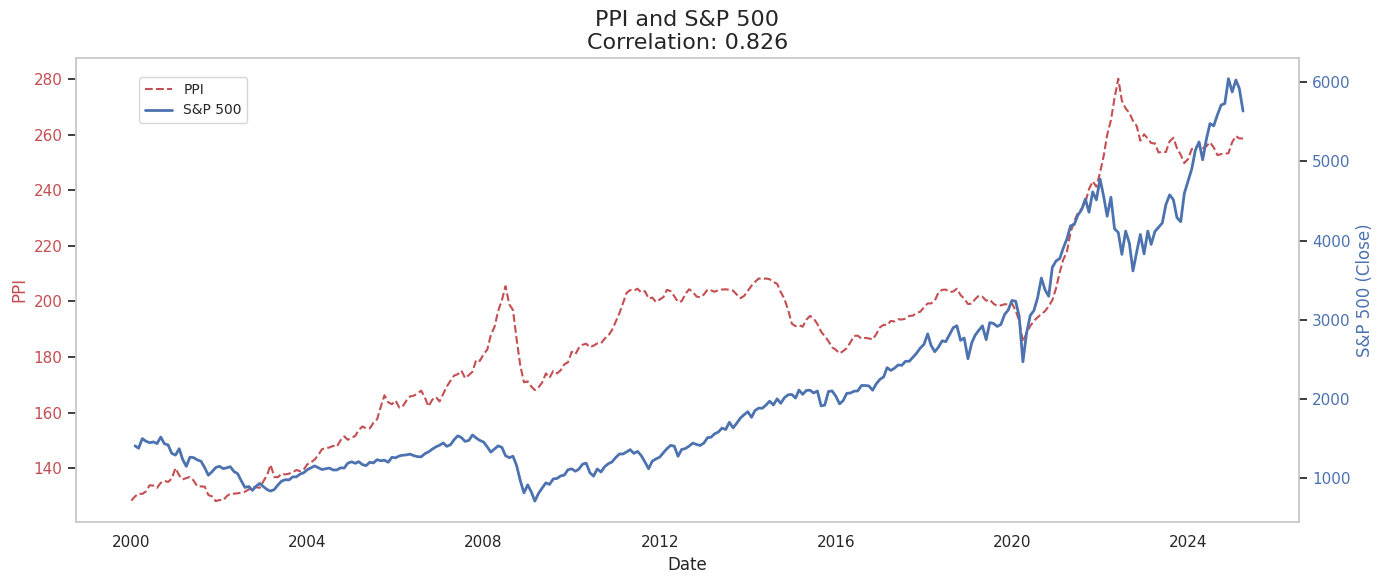

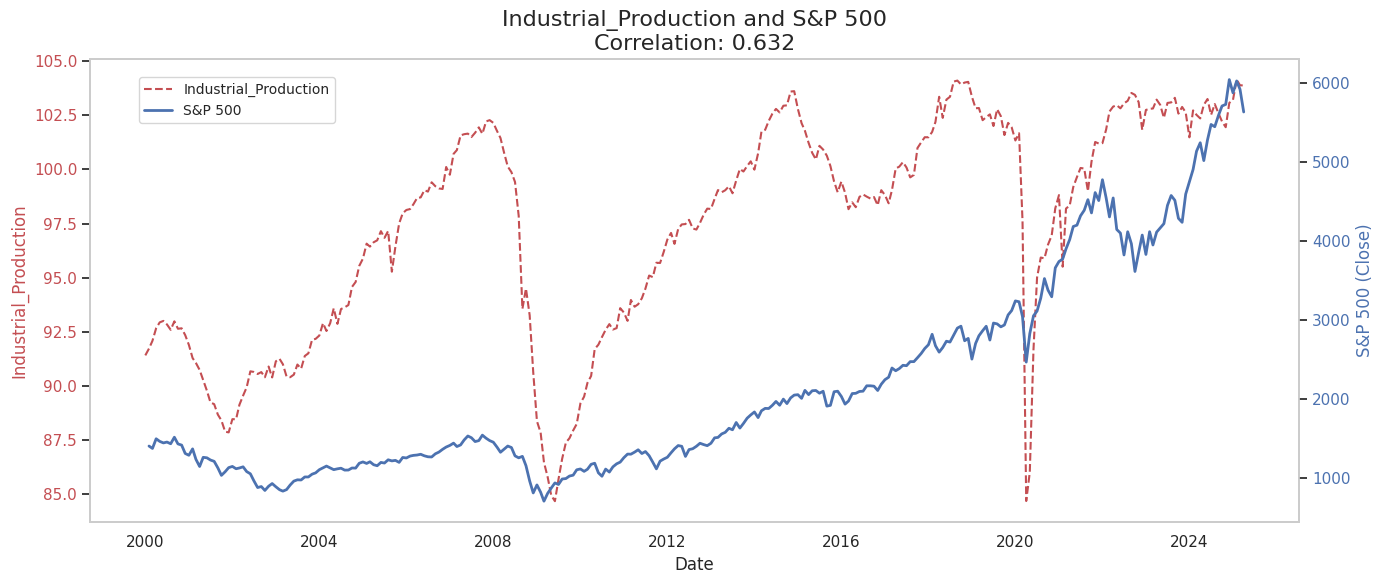

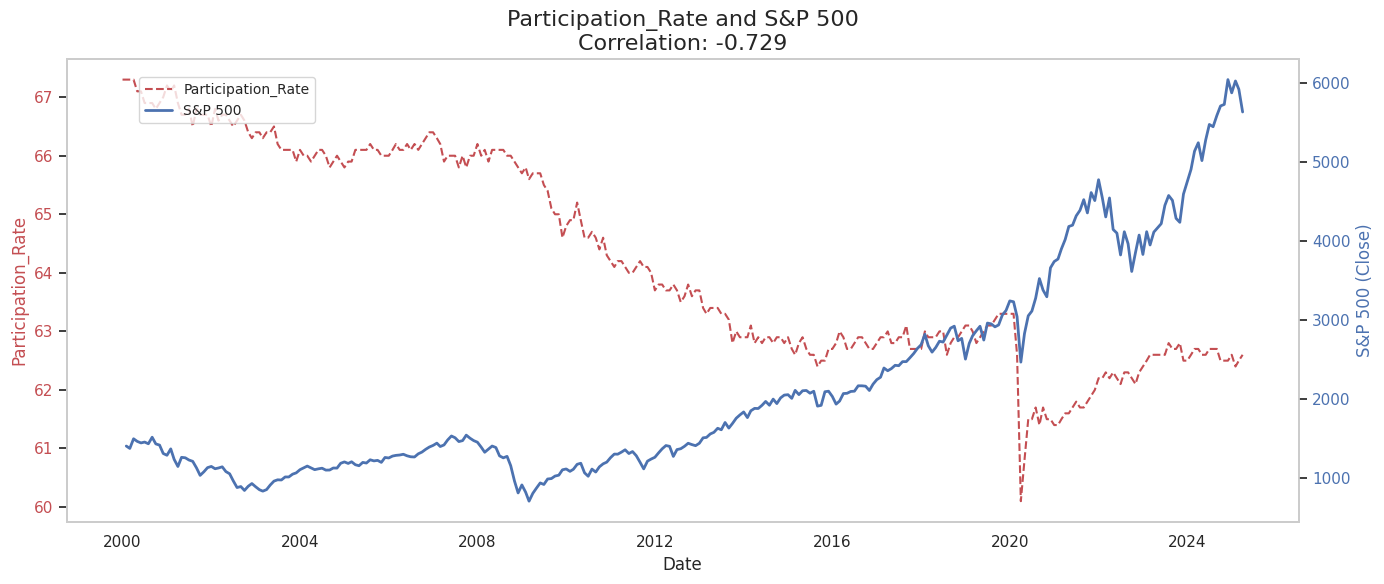

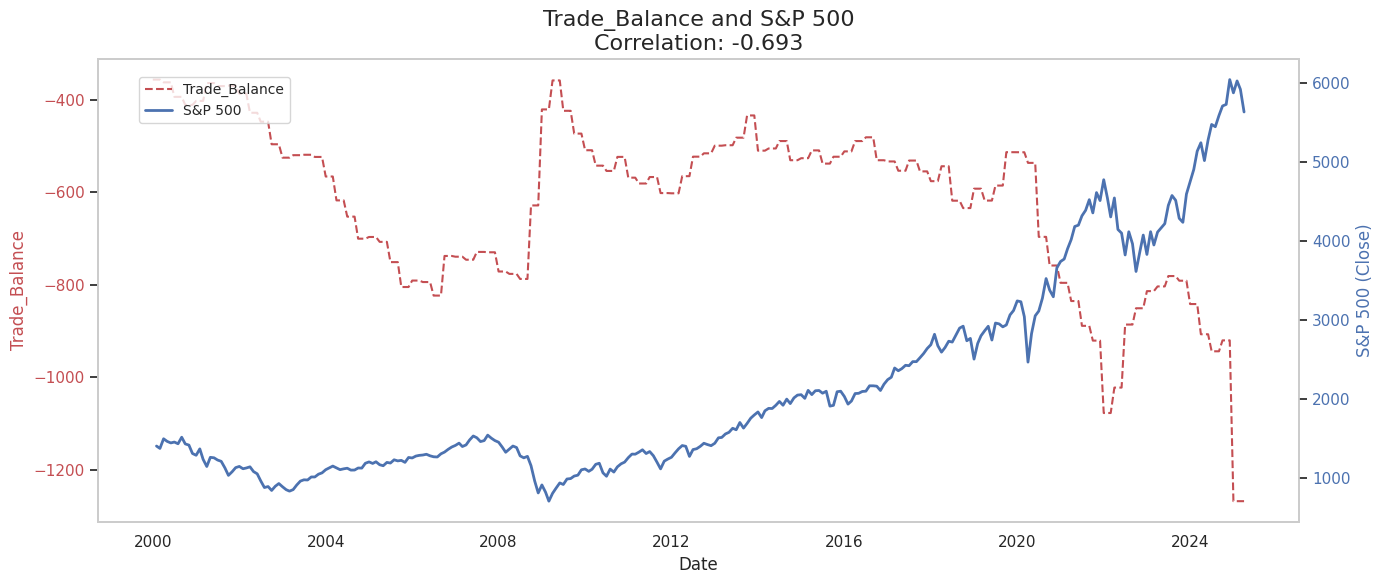

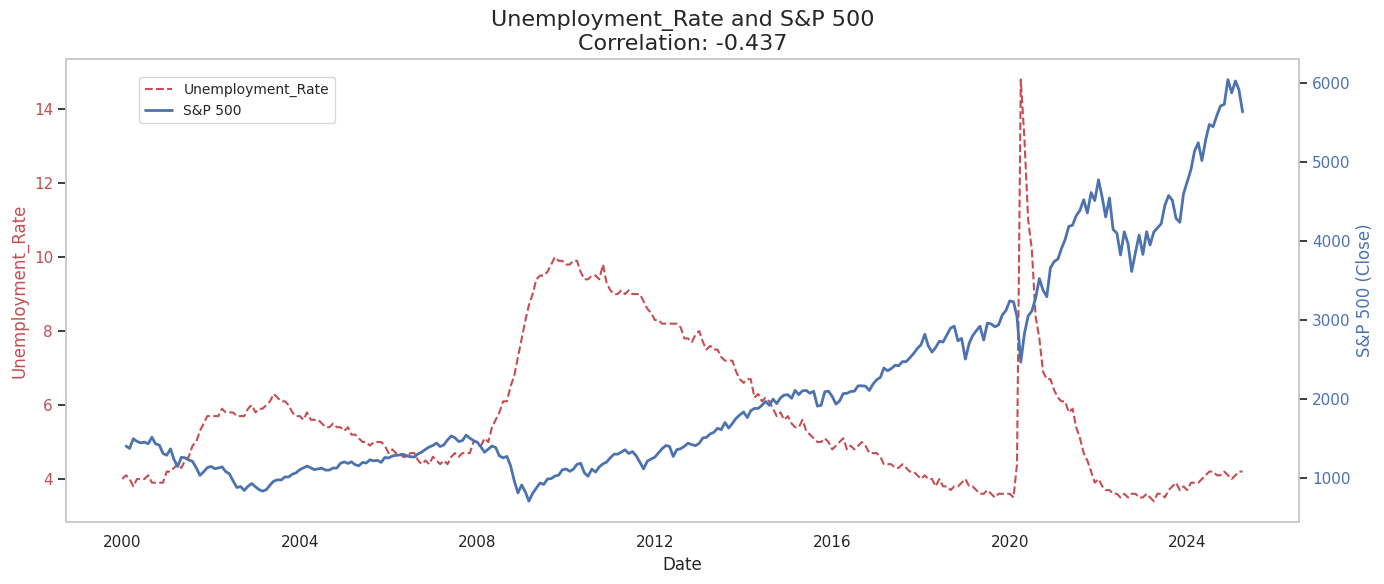

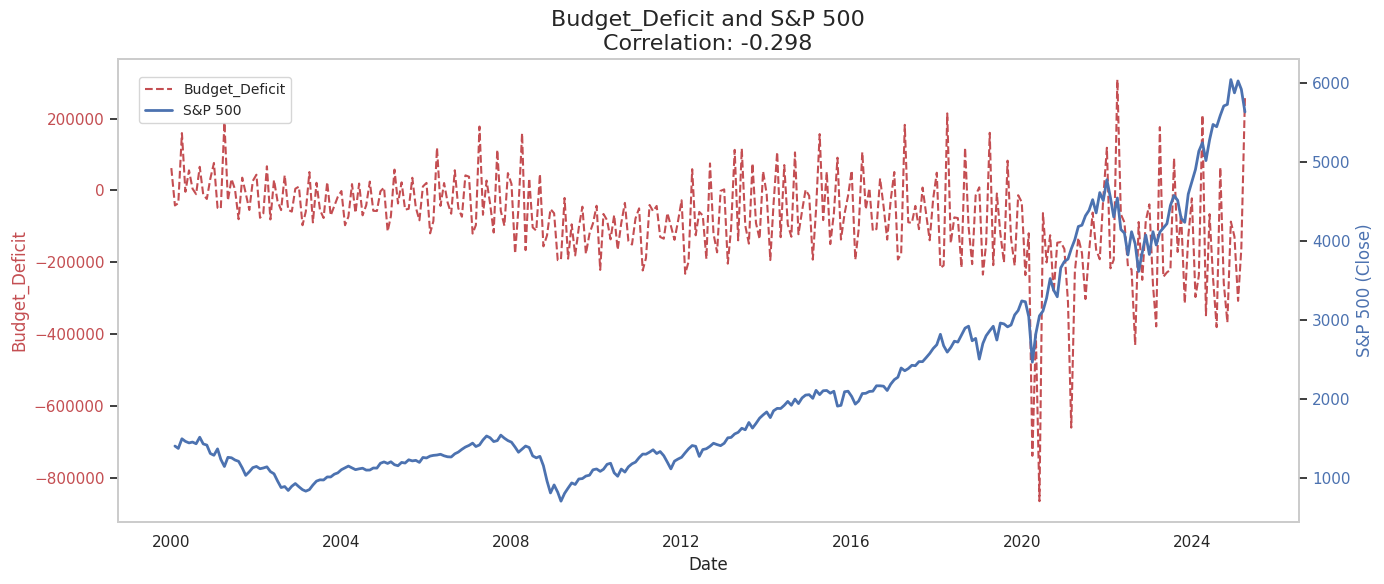

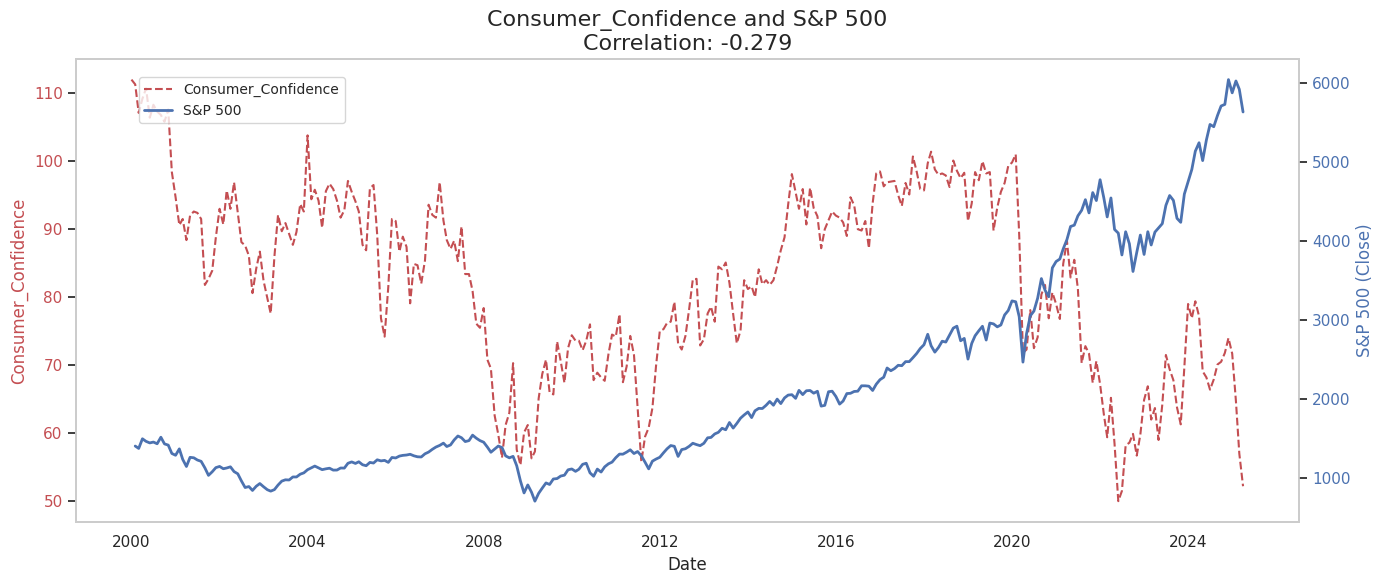

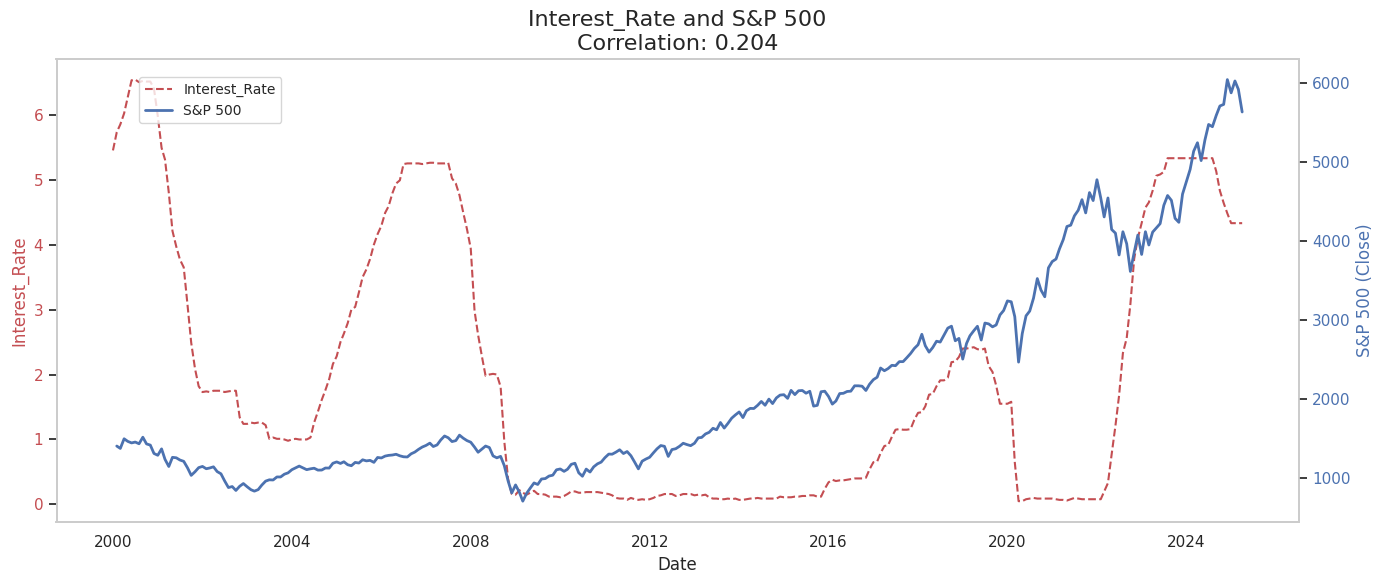

In [108]:
import matplotlib.dates as mdates

# Побудова графіків
for feature in selected_features:
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Перша вісь: економічний показник
    sns.lineplot(data=df_features, x=df_features.index, y=feature, ax=ax1, color='r', label=feature, linewidth=1.5, linestyle='--')
    ax1.set_ylabel(feature, color='r')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.tick_params(axis='y', labelcolor='r')
    ax1.set_xlabel('Date')

    # Друга вісь: S&P 500
    ax2 = ax1.twinx()
    sns.lineplot(data=df_features, x=df_features.index, y='Close', ax=ax2,
                 color='b', label='S&P 500', linewidth=2)
    ax2.set_ylabel('S&P 500 (Close)', color='b')
    ax2.tick_params(axis='y', labelcolor='b')

    # Вимикаємо сітку для обох осей
    ax1.grid(False)
    ax2.grid(False)

    # Забираємо автолегенди
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    lines = handles1 + handles2
    labels = labels1 + labels2

    # Видаляємо легенди з кожної осі
    ax1.legend_.remove()
    ax2.legend_.remove()

    # Виводимо одну спільну легенду
    fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.1, 0.87), fontsize=10)

    # Кореляція
    corr_val = df_features['Close'].corr(df_features[feature])
    plt.title(f'{feature} and S&P 500\nCorrelation: {corr_val:.3f}', fontsize=16)

    plt.tight_layout()
    plt.show()


#ML

## Декомпозиція. Стаціонарість. Сезонність

Тренд і сезонність (користуємось statsmodels):

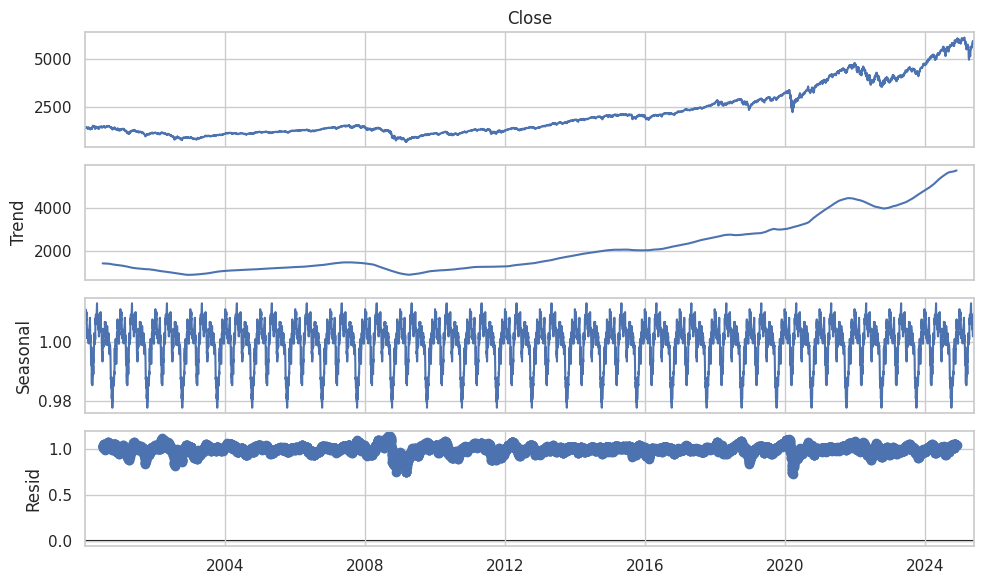

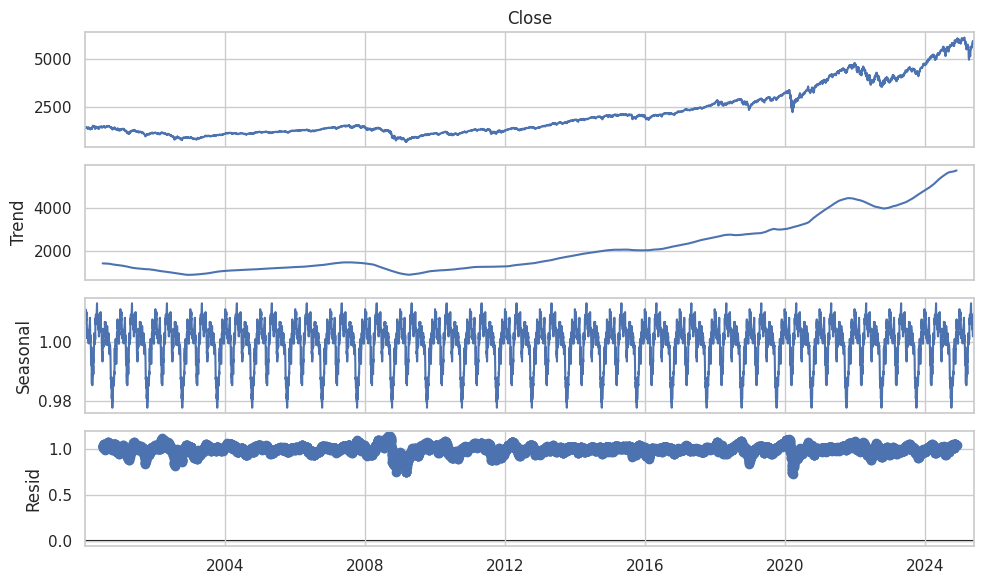

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
decomposition.plot()

Стаціонарність (тест Дікі-Фуллера)

In [110]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # Якщо p-value < 0.05, ряд стаціонарний
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.987442
p-value: 0.998656
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


H0 - ряд не є стаціонарним

Н1 - ряд стаціонарний
- Значення p-value (0.99) є більшим за 0.05, тому ми не можемо відхилити нульову гіпотезу про нестабільність ряду.
- Значення ADF статистики (1.98) є більшим за всі критичні значення, тому ми не можемо відхилити нульову гіпотезу.

Це означає, що ряд не є стаціонарним.

Якщо ряд нестабільний, потрібно диференціювати:

In [111]:
df['Close_diff'] = df['Close'].diff()
df.dropna(inplace=True)

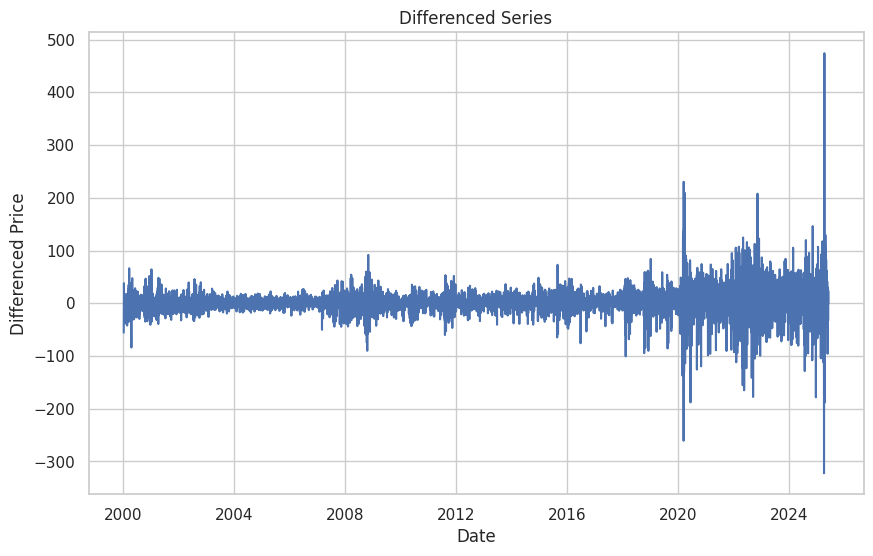

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close_diff'])
plt.title('Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()

In [113]:
# Виконання ADF тесту на продиференційованому ряді

result = adfuller(df['Close_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # Якщо p-value < 0.05, ряд стаціонарний
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.901204
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [114]:
result[1] # p-value

np.float64(1.0273763422092883e-29)

Отриманий часовий ряд є стаціонарним.
Як можна було б прологарифмувати і продиференціювати ряд:

<Axes: xlabel='Date'>

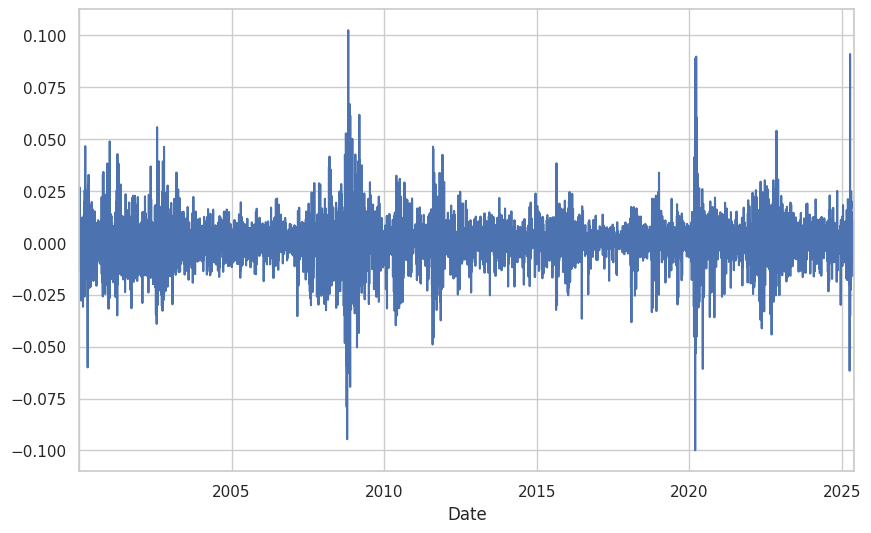

In [115]:
import numpy as np
np.log1p(df['Close']).diff().dropna().plot()

##Darts. Базові моделі


In [116]:
!pip3 install darts -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [117]:
from darts import TimeSeries

In [118]:
from darts import TimeSeries

# Завантаження даних в darts, індекс був перетворений в Darts індекс автоматично
series = TimeSeries.from_dataframe(df, value_cols='Close', fill_missing_dates=True, freq='D')

In [119]:
series

<TimeSeries (DataArray) (Date: 9279, component: 1, sample: 1)> Size: 74kB
array([[[1399.42004395]],

       [[1402.10998535]],

       [[1403.44995117]],

       ...,

       [[5888.54980469]],

       [[5912.16992188]],

       [[5911.68994141]]])
Coordinates:
  * Date       (Date) datetime64[ns] 74kB 2000-01-04 2000-01-05 ... 2025-05-30
  * component  (component) <U5 20B 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

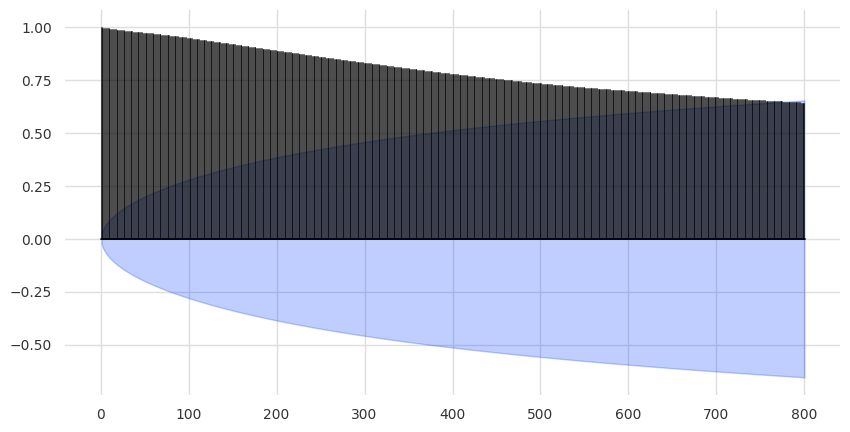

In [120]:
from darts.utils.statistics import plot_acf

plot_acf(series, max_lag=800)  # можна змінити max_lag залежно від довжини ряду

In [121]:
from darts.utils.statistics import check_seasonality

check_seasonality(series, m=300, max_lag=1000)

(False, 0)

In [122]:
for m in [7, 30, 90, 365]:
    print(f"Seasonality for period {m}: {check_seasonality(series, m, max_lag=1000)}")

Seasonality for period 7: (False, 0)
Seasonality for period 30: (False, 0)
Seasonality for period 90: (False, 0)
Seasonality for period 365: (False, 0)


✅ Висновок: SP500 НЕ має класичної сезонності
Це логічно:

S&P 500 має тренд і цикли, але не регулярну сезонність типу "кожні 12 місяців повторюється те саме".

Це не продажі, де сезонність — річна, квартальна, тощо.

Навпаки, тут важливі макроекономічні впливи, шоки, тренди.

<Axes: xlabel='Date'>

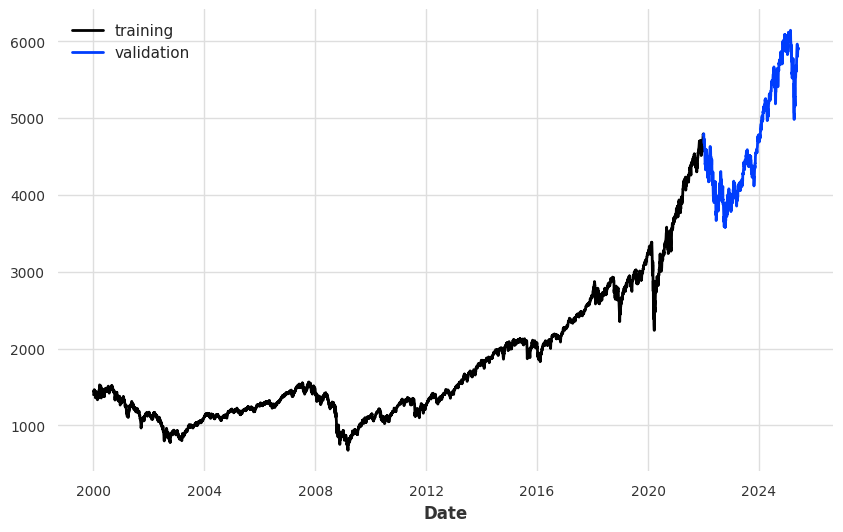

In [123]:
train, val = series.split_before(pd.Timestamp("2022-01-01"))
train.plot(label="training")
val.plot(label="validation")

<Axes: xlabel='Date'>

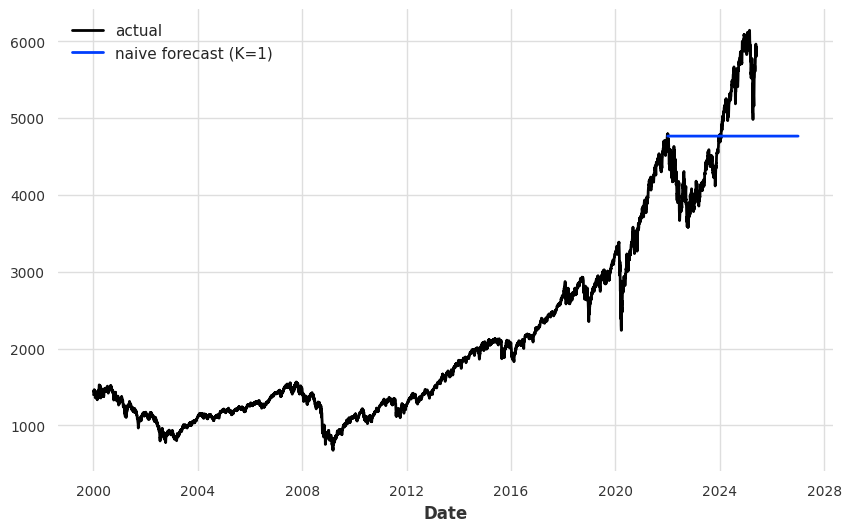

In [124]:
# базова наївна іграшкова модель

from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(365*5)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

Дуже легко підганяти моделі та створювати прогнози на TimeSeries. Усі моделі мають функції fit() та predict(). Це схоже на Scikit-learn, за винятком того, що це специфічно для часових рядів. Функція fit() приймає як аргумент навчальний часовий ряд, на якому буде підганятися модель, а функція predict() приймає як аргумент кількість часових кроків (після закінчення навчального ряду), на які буде здійснюватися прогноз.

<Axes: xlabel='Date'>

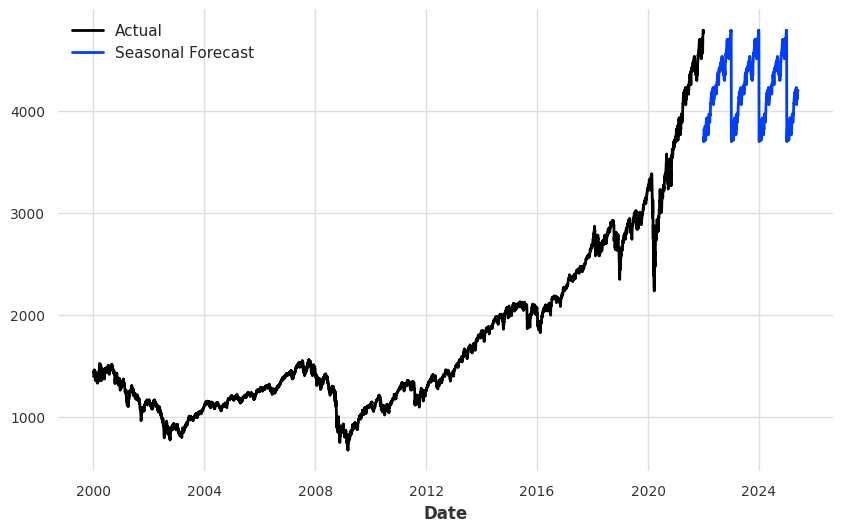

In [134]:
from darts.models import NaiveSeasonal

# Test seasonal patterns
seasonal_model = NaiveSeasonal(K=365)  # 1-year seasonality
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(len(val))

# Plot results
train.plot(label="Actual")
seasonal_forecast.plot(label="Seasonal Forecast")


<Axes: xlabel='Date'>

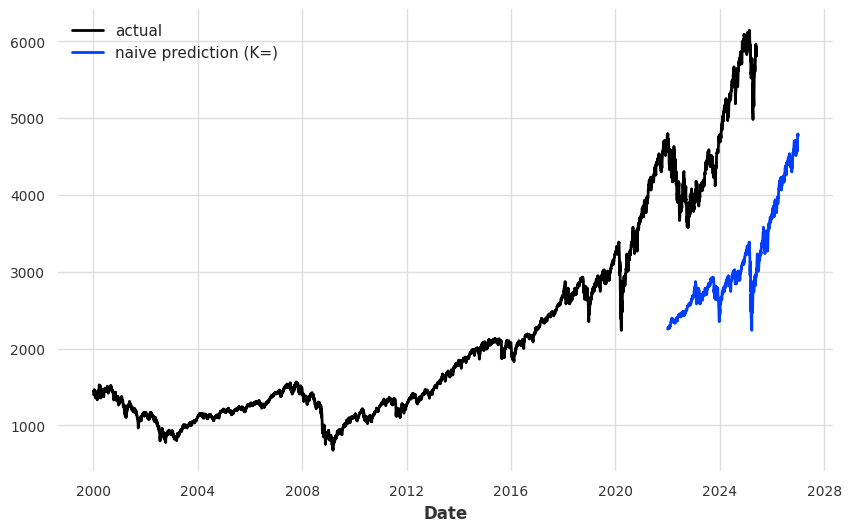

In [135]:
seasonal_model = NaiveSeasonal(K=365*5) # 10 років, вернулись на 2010 то так і передбачає, 5 років поки зе бест
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(365*5)

series.plot(label="actual")
seasonal_forecast.plot(label="naive prediction (K=)")

<Axes: xlabel='Date'>

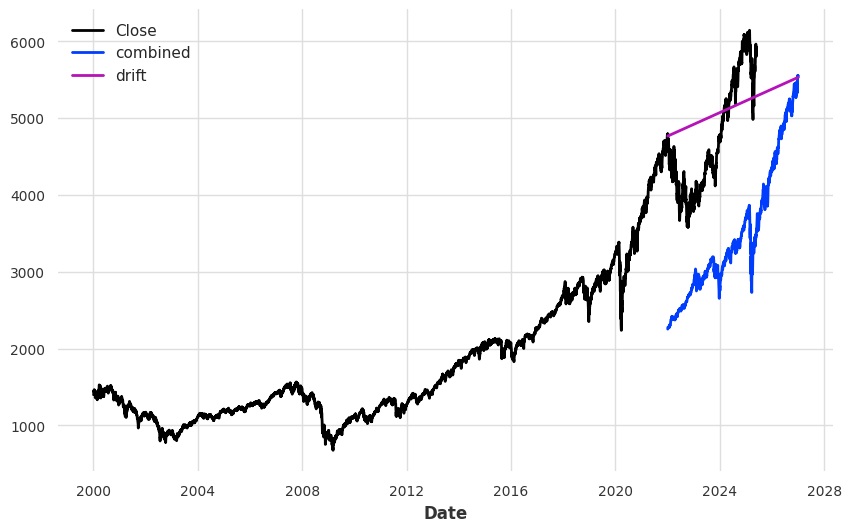

In [136]:
# додаємо тренд до базової моделі

from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(365*5)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

Висновки по базовим моделям

```markdown
| Модель                    | Плюси                                         | Мінуси                                           |
|---------------------------|-----------------------------------------------|--------------------------------------------------|
| NaiveSeasonal(K=1)        | Швидка, як бенчмарк                           | Плоска, не інформативна                          |
| NaiveSeasonal(K=365)      | Має сезонність                                | Ігнорує тренд                                    |
| NaiveSeasonal(K=5*365)    | Є і тренд, і цикл                             | Залежить від того, наскільки минуле схоже на майбутнє |
| NaiveDrift()              | Простий тренд                                 | Ігнорує сезонність                               |
| Drift + Seasonal          | Комбінує обидва ефекти                        | Все ще наївна модель                             |
```


## Функції. Обчислення помилки

In [137]:
def plot_results(series, forecast):
  # Візуалізація результатів
  series.plot(label='Actual')
  forecast.plot(label='Forecast', color='red')
  plt.legend()
  plt.show()

def fit_and_plot(model, series, train, val):
  model.fit(train)
  forecast = model.predict(len(val))
  plot_results(series, forecast)
  eval_forecast(model, val, forecast);

MAPE (Mean Absolute Percentage Error) — це середнє відхилення передбачення від фактичних значень, виражене у відсотках. Формула:


```markdown
| MAPE (%)  | Якість прогнозу  
-------------------------------------              
| 0–10%     | 🔥 Дуже точний прогноз
| 10–20%    | ✅ Хороший прогноз                               
| 20–50%    | ⚠️ Середній прогноз                          
| >50%      | ❌ Слабкий прогноз                                                
```

In [138]:
from darts.metrics import mape

print(
    f"Mean absolute percentage error for the combined naive drift + seasonal: {mape(series, combined_forecast):.2f}%."
)

Mean absolute percentage error for the combined naive drift + seasonal: 36.34%.


In [139]:
from darts.models import ExponentialSmoothing, AutoARIMA, Theta
from darts.metrics import mape

# Define evaluation function
def eval_forecast(model, val, forecast):
    mape_ = mape(val, forecast)
    print(f"Model {model.__class__.__name__} obtains MAPE: {mape_:.2f}%")
    return mape_

# Fit and evaluate model
def fit_eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    eval_forecast(model, val, forecast)

##Exponential Smoothing

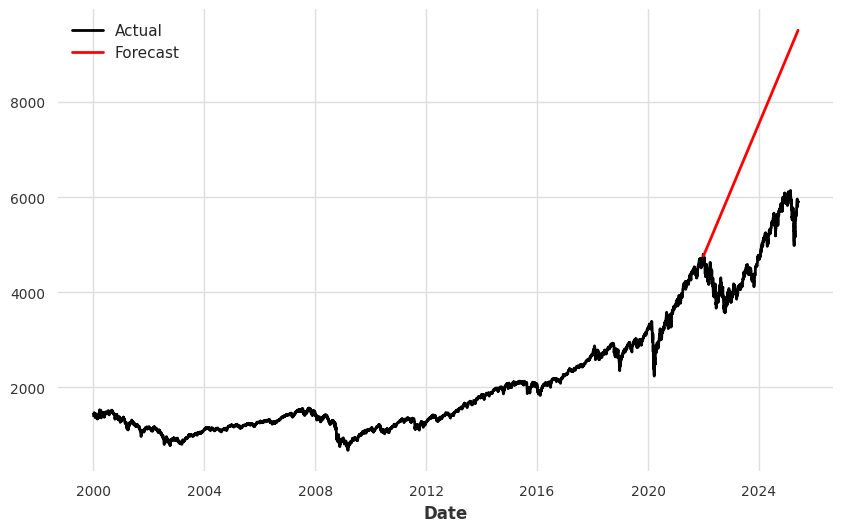

Model ExponentialSmoothing obtains MAPE: 50.24%


In [140]:
model = ExponentialSmoothing()
fit_and_plot(model, series, train, val)

In [141]:
model

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0, kwargs=None)

In [142]:
# !pip3 install --upgrade u8darts

##ARIMA. SARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



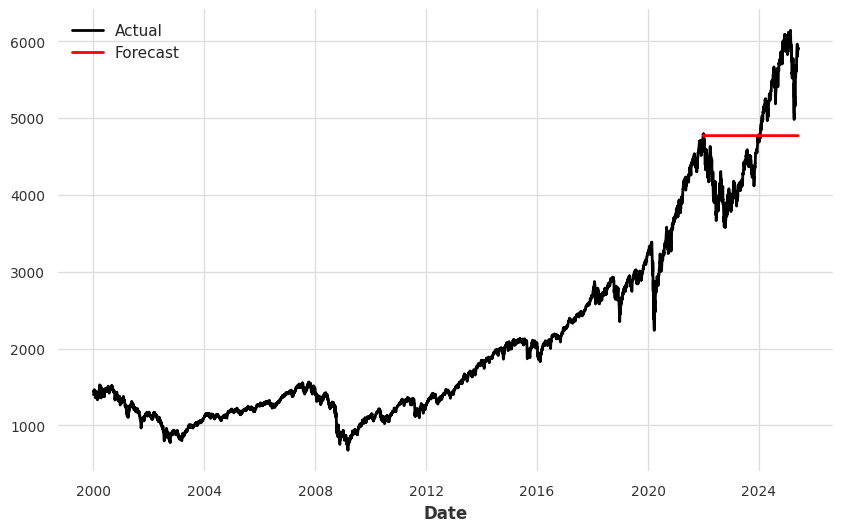

Model ARIMA obtains MAPE: 13.91%


In [143]:
from darts.models import ARIMA

# Побудова та тренування простої моделі ARIMA
model = ARIMA(p=12, d=1, q=12) # try p=12
fit_and_plot(model, series, train, val)

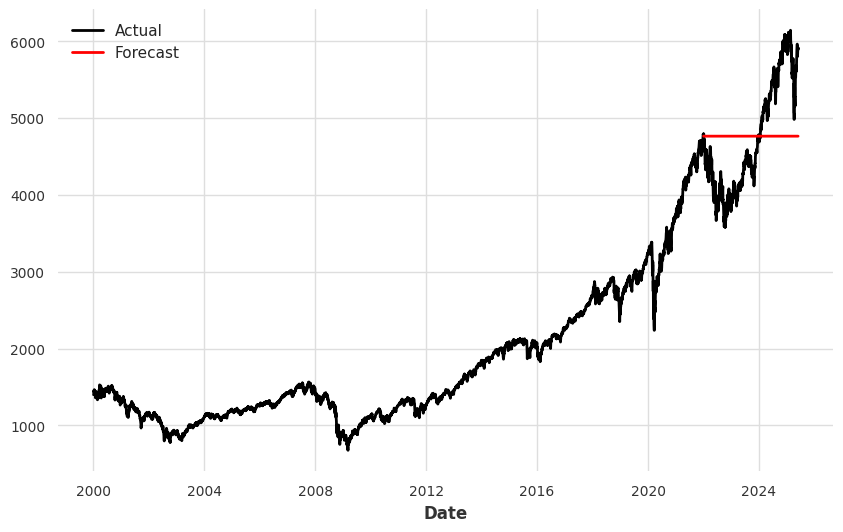

Model ARIMA obtains MAPE: 13.86%


In [144]:
from darts.models import ARIMA

# (p, d, q) - порядки моделі ARIMA
model = ARIMA(5, 1, 0)

fit_and_plot(model, series, train, val)


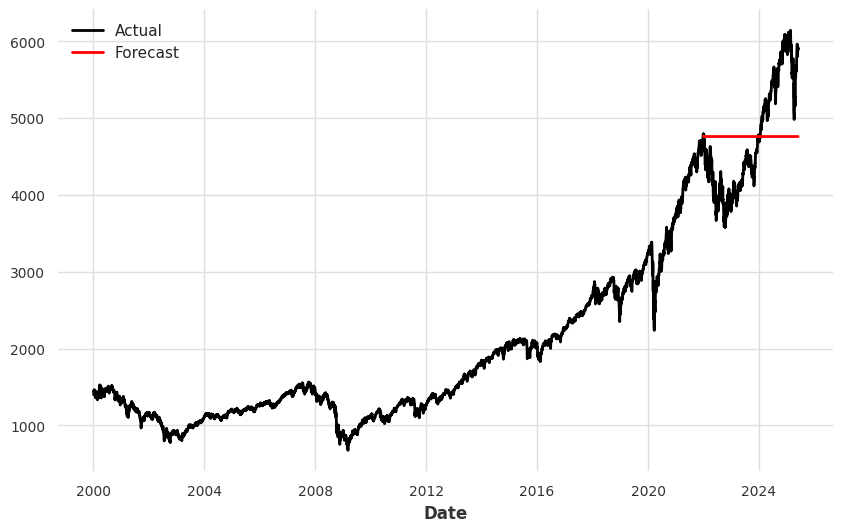

Model ARIMA obtains MAPE: 13.83%


In [145]:
from darts.models import ARIMA

# ARIMA з сезонністю (S=12 або 365, залежно від даних)
model = ARIMA((1, 1, 1), seasonal_order=(1, 0, 1, 12))

fit_and_plot(model, series, train, val)

###AUTOARIMA

darts має зручну обгортку для pmdarima.auto_arima, яка дозволяє автоматично підбирати параметри p, d, q, а також P, D, Q, s для сезонних моделей. Працює з TimeSeries форматом.



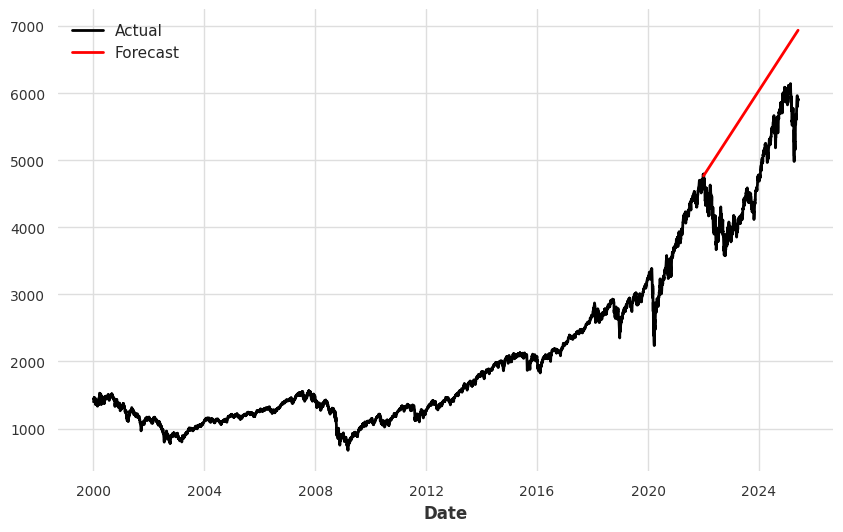

Model AutoARIMA obtains MAPE: 24.52%


In [146]:
# без сезонності
model = AutoARIMA(seasonal=False)
fit_and_plot(model, series, train, val)

In [147]:
# from darts.models import AutoARIMA

# model = AutoARIMA(seasonal=True, m=12)  # або m=365, якщо щоденні дані з річною сезонністю
# fit_and_plot(model, series, train, val)

## Theta

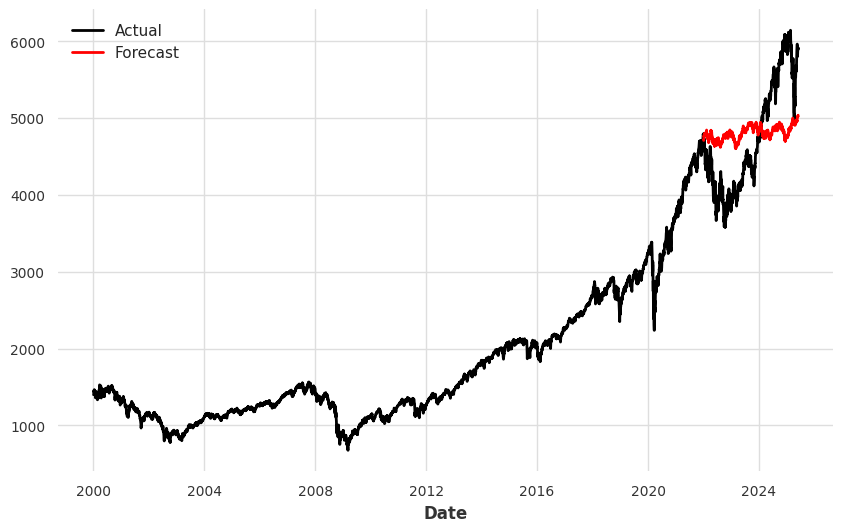

Model Theta obtains MAPE: 13.46%


In [148]:
from darts.models import Theta

model = Theta()
fit_and_plot(model, series, train, val)

## Facebook Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpetmwfgh4/9nebuvrx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpetmwfgh4/79hkpzr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87076', 'data', 'file=/tmp/tmpetmwfgh4/9nebuvrx.json', 'init=/tmp/tmpetmwfgh4/79hkpzr_.json', 'output', 'file=/tmp/tmpetmwfgh4/prophet_modell1nqzo1b/prophet_model-20250605194448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:44:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:44:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Axes: xlabel='Date'>

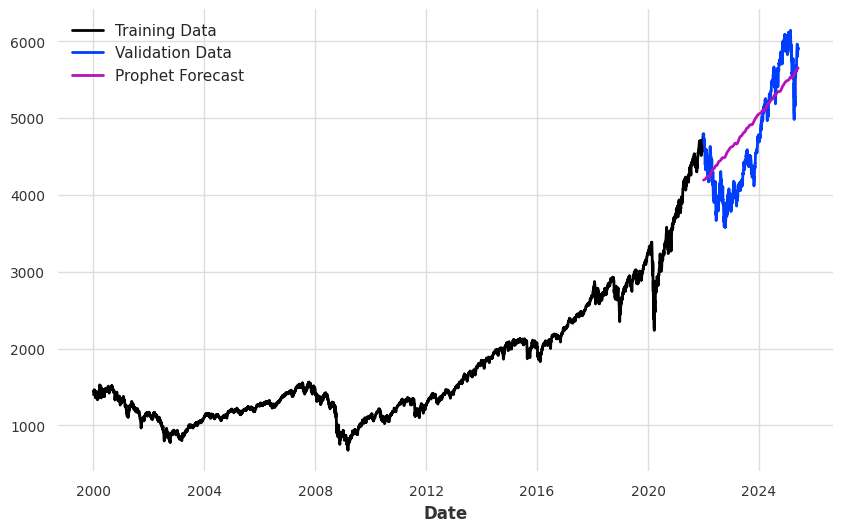

In [149]:
from darts.models import Prophet

model_prophet = Prophet()
model_prophet.fit(train)
forecast_prophet = model_prophet.predict(len(val))

train.plot(label="Training Data")
val.plot(label="Validation Data")
forecast_prophet.plot(label="Prophet Forecast")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpetmwfgh4/mzh4b41s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpetmwfgh4/umhgi9dp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80474', 'data', 'file=/tmp/tmpetmwfgh4/mzh4b41s.json', 'init=/tmp/tmpetmwfgh4/umhgi9dp.json', 'output', 'file=/tmp/tmpetmwfgh4/prophet_modelxrki1x7d/prophet_model-20250605194455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


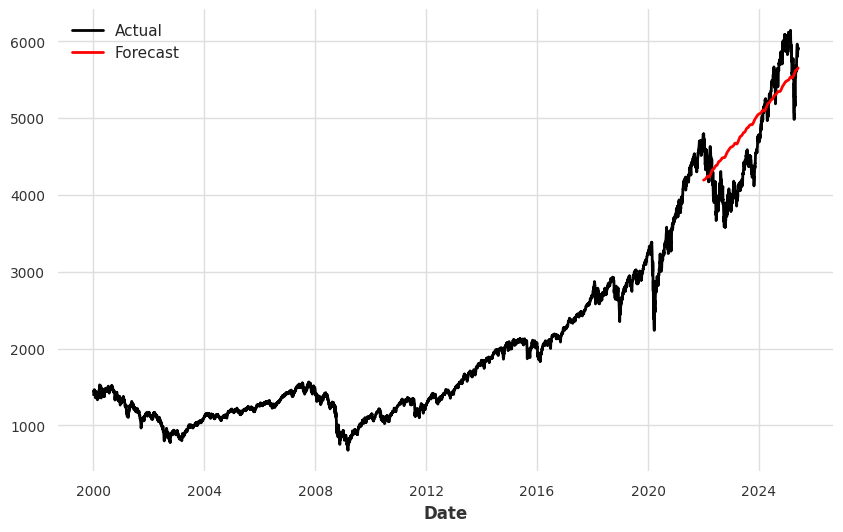

Model Prophet obtains MAPE: 8.92%


In [150]:
fit_and_plot(model_prophet, series, train, val)

Prophet найкраще уловлює довгостроковий тренд у SP500.

Theta — гарний “baseline”, але простий.

ARIMA поступається Prophet, бо не бачить складних нелінійностей.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpetmwfgh4/5udy4uvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpetmwfgh4/hrngtbs2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44465', 'data', 'file=/tmp/tmpetmwfgh4/5udy4uvc.json', 'init=/tmp/tmpetmwfgh4/hrngtbs2.json', 'output', 'file=/tmp/tmpetmwfgh4/prophet_modeldcbtj2yw/prophet_model-20250605194501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:45:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:45:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Axes: xlabel='Date'>

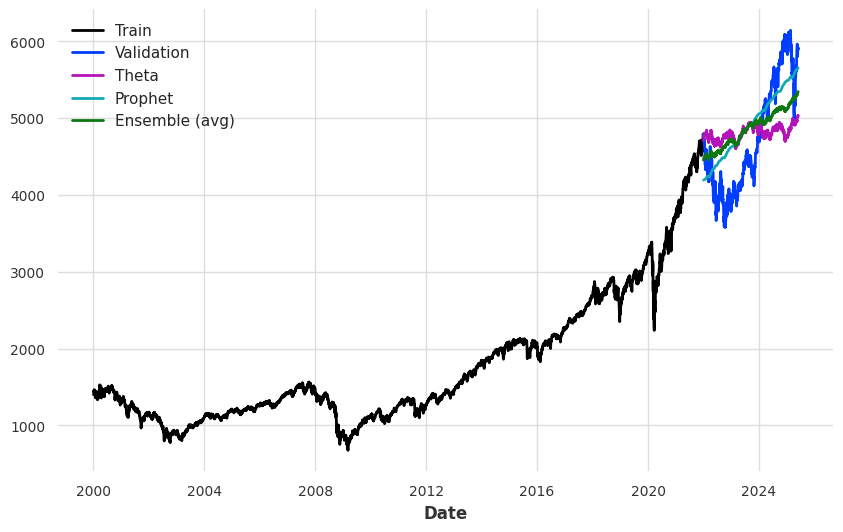

In [151]:
from darts.models import Prophet, Theta
from darts.metrics import mape

# Створюємо та тренуємо моделі
model_theta = Theta()
model_prophet = Prophet()

model_theta.fit(train)
model_prophet.fit(train)

# Прогнози на довжину валідації
forecast_theta = model_theta.predict(len(val))
forecast_prophet = model_prophet.predict(len(val))

# Середнє двох моделей (простий ансамбль)
ensemble_forecast = (forecast_theta + forecast_prophet) / 2

# Побудова графіка
train.plot(label="Train")
val.plot(label="Validation")
forecast_theta.plot(label="Theta")
forecast_prophet.plot(label="Prophet")
ensemble_forecast.plot(label="Ensemble (avg)")

In [152]:
# Оцінка точності
ensemble_mape = mape(val, ensemble_forecast)
print(f"Ensemble MAPE: {ensemble_mape:.2f}%")

Ensemble MAPE: 10.74%


Але Prophet окремо мав 8.92%, тож є сенс дати йому більшу вагу у прогнозі.

Weighted Ensemble MAPE: 9.19%


<Axes: xlabel='Date'>

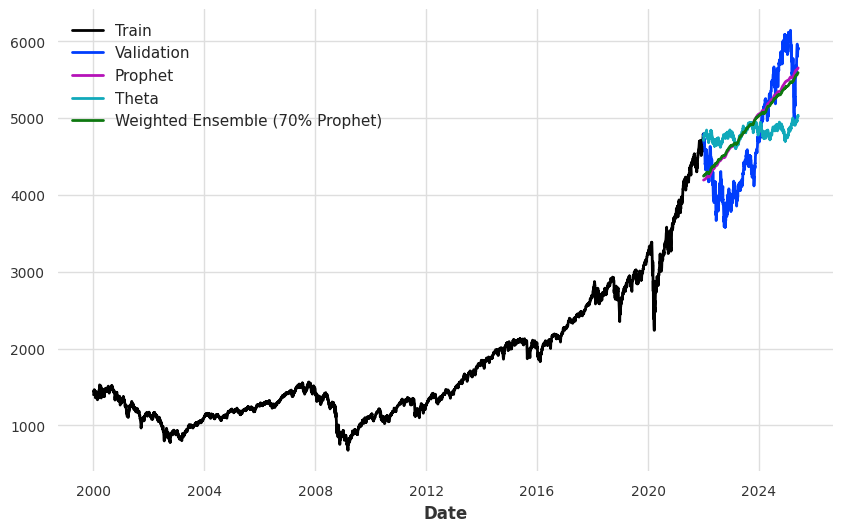

In [153]:
# Ваговий ансамбль (70% Prophet, 30% Theta)
ensemble_weighted = 0.9 * forecast_prophet + 0.1 * forecast_theta

# Оцінка
weighted_mape = mape(val, ensemble_weighted)
print(f"Weighted Ensemble MAPE: {weighted_mape:.2f}%")

# Графік
train.plot(label="Train")
val.plot(label="Validation")
forecast_prophet.plot(label="Prophet")
forecast_theta.plot(label="Theta")
ensemble_weighted.plot(label="Weighted Ensemble (70% Prophet)")


експеримент підтвердив, що чистий Prophet (MAPE 8.92%) > ансамбль (найкращий — 9.14%).

### 📊 Порівняння моделей на базі лише S&P 500 (`series`)

| Модель                         | MAPE (%) | Коментар                                      |
|-------------------------------|----------|-----------------------------------------------|
| **ARIMA(1,1,1) + сезонність** | 13.77%   | Стабільна, враховує тренд і слабку сезонність |
| ARIMA(5,1,0)                   | 13.80%   | Без сезонності, простий трендовий варіант     |
| ARIMA(12,1,12)                | 13.86%   | Більш агресивна модель, не покращила          |
| **Theta**                     | 13.46%   | Легка та стабільна для тренду                 |
| **Prophet**                   | **8.92%**| 🥇 Найкращий результат, вловлює тренд          |
| AutoARIMA (без сезонності)   | 53.35%   | ❌ Поганий результат                           |
| Ensemble (Prophet + Theta)   | 10.94%   | Легка стабілізація, але гірше за Prophet      |
| Ensemble (90% Prophet)       | 9.14%    | Близько до Prophet, але не краще              |



**Трендова природа індексу S&P 500**

Індекс S&P 500 характеризується яскраво вираженою трендовою поведінкою, що зумовлено довгостроковим економічним зростанням, корпоративними прибутками та інфляційними процесами. На відміну від деяких економічних показників або фінансових серій (наприклад, продажів у роздрібній торгівлі), S&P 500 не має регулярної сезонності — таких повторюваних шаблонів, які виникають, наприклад, щороку чи щокварталу.

Проте динаміка індексу чутлива до бізнес-циклів, економічних шоків, монетарної політики та геополітичних подій, що призводить до змін у темпах зростання або тимчасових спадів. Такі коливання створюють складну структуру ряду, де довгостроковий тренд співіснує з короткостроковими відхиленнями, але без повторюваної сезонної складової.

Таким чином, при моделюванні індексу доцільніше зосередитись на виявленні трендів, циклічних компонентів і впливів зовнішніх факторів, а не на сезонності в класичному розумінні.




---




**Далі будуватимемо моделі з фічами**

Нагадуємо, що було обрано залищити частоту рідких фічів

⚠️ І певні фічі були "last known value" — бо це логічно у макроекономіці: GDP не змінюється щомісяця, але його останнє значення актуальне.

Оскільки макроекономічні показники оновлюються щомісяця або щокварталу, форвардне заповнення було використано для поширення останнього відомого значення. Це поширена практика в економічному прогнозуванні, яка відображає припущення, що учасники ринку покладаються на останні опубліковані дані.


| Частота індикаторів                  | Рекомендації                                                           |
| ------------------------ | ---------------------------------------------------------------------- |
| **Місячна (оптимально)** | CPI, Unemployment, PPI, Retail Sales, Consumer Confidence              |
| **Квартальна**           | GDP, Government Debt → тільки якщо теж агрегуєш `S&P` до кварталів       |
| **Щоденна**              | Технічні індикатори (SMA, EMA, RSI) — використовуються з `S&P` як фічі |



Макроекономічні показники використовуються не як високочастотні предиктори, а скоріше як контекстні змінні, що повільно змінюються, доповнюючи технічні індикатори (наприклад, RSI, SMA, Momentum), отримані з індексу S&P 500.

# Model 1 with features: XGBoost

Варіант 1: економічні індикатори з лагами індексу йдуть в одну XGBoost-модель;

In [154]:
def add_lags(df, col, lags=[1, 2, 3]):
    for lag in lags:
        df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return df

# Додаємо лаги тільки для 'Close'
df_lagged = add_lags(df_features.copy(), 'Close', lags=[1, 2, 3, 6, 12])
df_lagged.dropna(inplace=True)

In [155]:
df_lagged

Close  Retail_Sales        GDP  Government_Debt  Core_CPI  \
2001-02-01  1373.469971      272627.0  10470.231        5773740.0   184.400   
2001-03-01  1241.229980      269820.0  10470.231        5773740.0   184.700   
2001-04-01  1150.689982      274410.0  10599.000        5726815.0   185.100   
2001-05-01  1266.439941      275769.0  10599.000        5726815.0   185.300   
2001-06-01  1260.670044      274474.0  10599.000        5726815.0   186.000   
...                 ...           ...        ...              ...       ...   
2024-12-01  6042.226562      717662.0  29723.864       36218605.0   323.296   
2025-01-01  5875.089844      711461.0  29976.638       36214310.0   324.739   
2025-02-01  6025.209798      711757.0  29976.638       36214310.0   325.475   
2025-03-01  5919.573405      723714.0  29976.638       36214310.0   325.659   
2025-04-01  5633.069824      724131.0  29976.638       36214310.0   326.430   

            GDP_Nowcast      CPI  Non_Farm_Payrolls  Durable_Goods_Orders  \
2001-02-01    14183.120  176.000           132788.0              180276.0   
2001-03-01    14183.120  176.100           132751.0              182209.0   
2001-04-01    14271.694  176.400           132457.0              171850.0   
2001-05-01    14271.694  177.300           132409.0              177749.0   
2001-06-01    14271.694  177.700           132299.0              176350.0   
...                 ...      ...                ...                   ...   
2024-12-01    23542.349  317.603           158942.0              290559.0   
2025-01-01    23528.047  319.086           159053.0              291195.0   
2025-02-01    23528.047  319.775           159155.0              293985.0   
2025-03-01    23528.047  319.615           159340.0              316215.0   
2025-04-01    23528.047  320.321           159517.0              296193.0   

                PPI  ...  Trade_Balance  Unemployment_Rate  Budget_Deficit  \
2001-02-01  137.400  ...       -402.653                4.2   -48168.000000   
2001-03-01  135.900  ...       -402.653                4.3   -50662.000000   
2001-04-01  136.400  ...       -364.015                4.4   189796.000000   
2001-05-01  136.800  ...       -364.015                4.3   -27919.000000   
2001-06-01  135.500  ...       -364.015                4.5    31862.000000   
...             ...  ...            ...                ...             ...   
2024-12-01  253.423  ...       -920.084                4.1   -86731.619013   
2025-01-01  257.376  ...      -1267.561                4.0  -128640.206673   
2025-02-01  259.581  ...      -1267.561                4.1  -307017.194699   
2025-03-01  258.711  ...      -1267.561                4.2  -160530.321499   
2025-04-01  258.712  ...      -1267.561                4.2   258399.949115   

            Consumer_Confidence  Interest_Rate  Close_lag_1  Close_lag_2  \
2001-02-01                 90.6           5.49  1292.522522  1315.229980   
2001-03-01                 91.5           5.31  1373.469971  1292.522522   
2001-04-01                 88.4           4.80  1241.229980  1373.469971   
2001-05-01                 92.0           4.21  1150.689982  1241.229980   
2001-06-01                 92.6           3.97  1266.439941  1150.689982   
...                         ...            ...          ...          ...   
2024-12-01                 74.0           4.48  5728.799805  5708.750000   
2025-01-01                 71.7           4.33  6042.226562  5728.799805   
2025-02-01                 64.7           4.33  5875.089844  6042.226562   
2025-03-01                 57.0           4.33  6025.209798  5875.089844   
2025-04-01                 52.2           4.33  5919.573405  6025.209798   

            Close_lag_3  Close_lag_6  Close_lag_12  
2001-02-01  1421.219971  1438.099976   1409.280029  
2001-03-01  1315.229980  1520.770020   1379.189941  
2001-04-01  1292.522522  1436.323324   1501.043294  
2001-05-01  1373.469971  1421.219971   1468.250000  
2001-06-01  1241.229980  1315

In [156]:
# Цільова змінна — значення S&P 500 на наступний місяць
df_lagged['target'] = df_lagged['Close'].shift(-1)
df_lagged.dropna(inplace=True)

# Вибираємо X і y
X = df_lagged.drop(columns=['target', 'Close'])
y = df_lagged['target']

# Train/test split
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=False, test_size=0.2)


**Використаємо тут TimeSeriesSplit для XGBoost**

series.split_before(...) (розбиття за певною датою)
→ ідеально для всіх моделей, що очікують цілісний часовий ряд, без обривів:

Prophet

LSTM

TimeSeriesSplit
→ ідеально для класичних ML-моделей (XGBoost, RandomForest), які не залежать від безперервності даних, і де важливо бачити поступове "навчання на минулому — тестування на майбутньому".

In [157]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

tscv = TimeSeriesSplit(n_splits=5)
mape_scores = []

X_np = X.values  # правильне перетворення
y_np = y.values  # правильне перетворення

for train_index, val_index in tscv.split(X_np):  # ТУТ X_np
    X_train_fold, X_val_fold = X_np[train_index], X_np[val_index]  # ТУТ X_np
    y_train_fold, y_val_fold = y_np[train_index], y_np[val_index]  # ТУТ y_np

    model = XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)

    mape_fold = mean_absolute_percentage_error(y_val_fold, y_pred_fold) * 100
    mape_scores.append(mape_fold)
    mae = mean_absolute_error(y_val_fold, y_pred_fold)

print(f"Average MAPE with TimeSeriesSplit: {np.mean(mape_scores):.2f}%")
print(f'XGBoost MAE: {mae:.2f}')


Average MAPE with TimeSeriesSplit: 19.12%
XGBoost MAE: 707.91


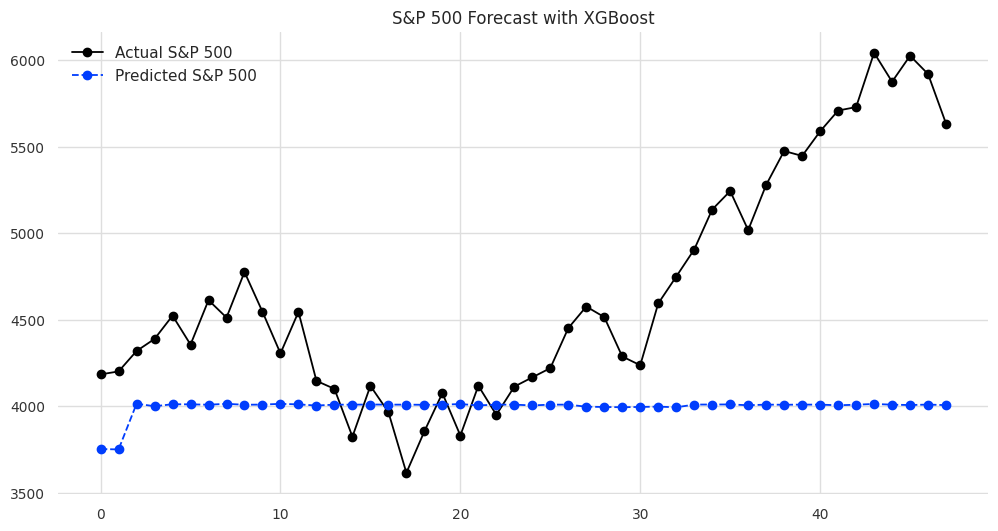

In [158]:
plt.figure(figsize=(12,6))
plt.plot(y_val_fold, label="Actual S&P 500", marker='o')
plt.plot(y_pred_fold, label="Predicted S&P 500", marker='o', linestyle="dashed")
plt.legend()
plt.title("S&P 500 Forecast with XGBoost")
plt.show()

Модель "вгадує середнє", але не вловлює хвилеподібну структуру. Варто спробувати додати trend-фічі або використовувати longer lags (напр., 24, 36) чи rolling statistics (mean, std).

Переходимо до Optuna для автоматичного підбору гіперпараметрів XGBoost

In [159]:
!pip3 install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.7 MB/s eta 0:00:00


In [160]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Підготовка даних
X_np = X.values
y_np = y.values

# Визначаємо функцію оптимізації
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'random_state': 42
    }

    model = XGBRegressor(**params)

    tscv = TimeSeriesSplit(n_splits=5)
    mape_scores = []

    for train_index, val_index in tscv.split(X_np):
        X_train_fold, X_val_fold = X_np[train_index], X_np[val_index]
        y_train_fold, y_val_fold = y_np[train_index], y_np[val_index]

        model.fit(X_train_fold, y_train_fold, verbose=0)
        y_pred_fold = model.predict(X_val_fold)

        mape = mean_absolute_percentage_error(y_val_fold, y_pred_fold) * 100
        mape_scores.append(mape)

    return np.mean(mape_scores)

# Створення і запуск Optuna дослідження
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # 50 спроб (можна більше)

# Виводимо найкращі параметри
print("Best hyperparameters:", study.best_params)
print("Best MAPE:", study.best_value)


[I 2025-06-05 19:45:13,451] A new study created in memory with name: no-name-310d4a63-1de4-415e-86e8-8b7d533afead
[I 2025-06-05 19:45:17,490] Trial 0 finished with value: 19.488835772492685 and parameters: {'n_estimators': 886, 'max_depth': 4, 'learning_rate': 0.042339661039805535, 'subsample': 0.5818362449407204, 'colsample_bytree': 0.732779919775231, 'gamma': 1.8841640163075979}. Best is trial 0 with value: 19.488835772492685.
[I 2025-06-05 19:45:20,040] Trial 1 finished with value: 18.76365492106046 and parameters: {'n_estimators': 685, 'max_depth': 5, 'learning_rate': 0.20473941023350112, 'subsample': 0.6419647878659407, 'colsample_bytree': 0.8816136802204378, 'gamma': 3.6283734870992417}. Best is trial 1 with value: 18.76365492106046.
[I 2025-06-05 19:45:26,259] Trial 2 finished with value: 18.549688001413028 and parameters: {'n_estimators': 228, 'max_depth': 10, 'learning_rate': 0.06813413525680859, 'subsample': 0.6418827455183866, 'colsample_bytree': 0.9255178582400763, 'gamma':

Best hyperparameters: {'n_estimators': 611, 'max_depth': 8, 'learning_rate': 0.2570379011803504, 'subsample': 0.8366833506082848, 'colsample_bytree': 0.8005492795933058, 'gamma': 0.9343500397543636}
Best MAPE: 17.238634691012443


Final XGBoost MAPE: 13.61%
Final XGBoost MAE: 699.47


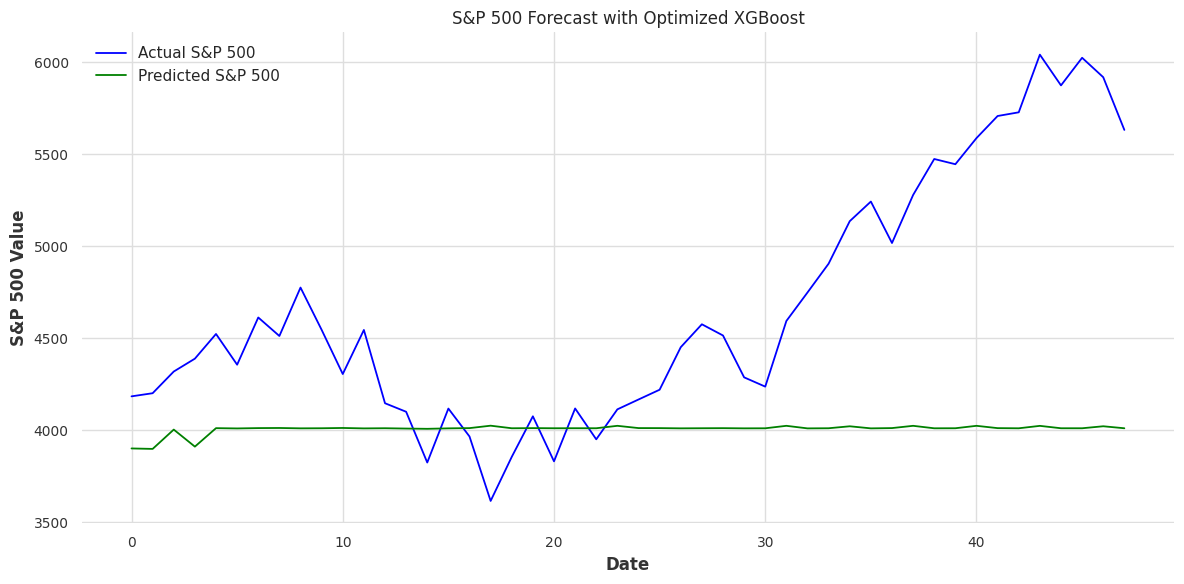

In [161]:
best_params = {
    'n_estimators': 258,
    'max_depth': 7,
    'learning_rate': 0.13150463139235652,
    'subsample': 0.8123602103445206,
    'colsample_bytree': 0.8574884504869476,
    'gamma': 2.5339209603782695,
    'random_state': 42
}

final_model = XGBRegressor(**best_params)

# Навчання на всьому train-наборі (80%)
final_model.fit(X_train_fold, y_train_fold)

# Прогнозування на валідації (20%)
y_pred_final = final_model.predict(X_val_fold)


# Оцінка
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mape_final = mean_absolute_percentage_error(y_val_fold, y_pred_final) * 100
mae_final = mean_absolute_error(y_val_fold, y_pred_final)

print(f"Final XGBoost MAPE: {mape_final:.2f}%")
print(f"Final XGBoost MAE: {mae_final:.2f}")

# Графік Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_val_fold, label='Actual S&P 500', color='blue')
plt.plot(y_pred_final, label='Predicted S&P 500', color='green')
plt.title('S&P 500 Forecast with Optimized XGBoost')
plt.xlabel('Date')
plt.ylabel('S&P 500 Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Варіант 2 : технічні індикатори без лаґів тренуються окремо в іншій моделі.

In [162]:
!pip install ta --quiet

  Preparing metadata (setup.py) ... done


XGBoost (with technical indicators) MAPE: 21.38%
XGBoost (with technical indicators) MAE: 1055.88


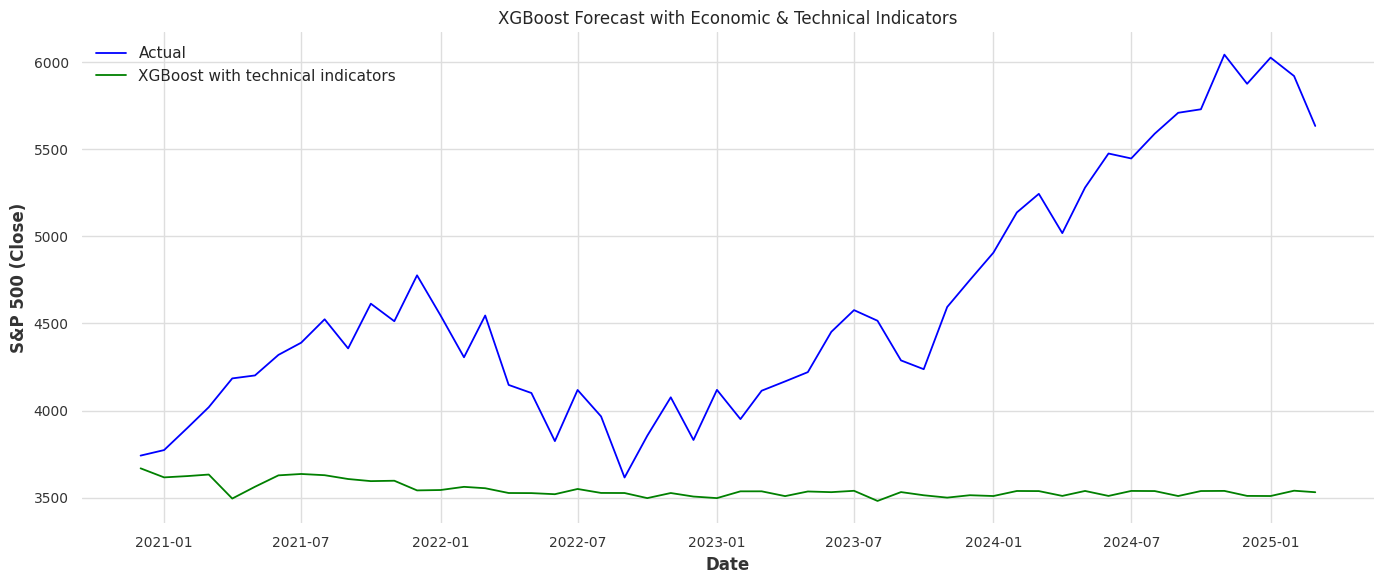

In [163]:
import ta
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# 1. Створення технічних індикаторів
df_tech = df_features.copy()

# SMA та EMA
df_tech['SMA_10'] = ta.trend.sma_indicator(df_tech['Close'], window=10)
df_tech['SMA_30'] = ta.trend.sma_indicator(df_tech['Close'], window=30)
df_tech['EMA_10'] = ta.trend.ema_indicator(df_tech['Close'], window=10)
df_tech['EMA_30'] = ta.trend.ema_indicator(df_tech['Close'], window=30)

# Momentum, RSI, MACD
df_tech['Momentum'] = ta.momentum.roc(df_tech['Close'], window=5)
df_tech['RSI'] = ta.momentum.rsi(df_tech['Close'], window=14)
df_tech['MACD'] = ta.trend.macd_diff(df_tech['Close'])

# Видаляємо пропущені значення
df_tech.dropna(inplace=True)

# 2. Додаємо лаги для Close
def add_lags(df, col, lags=[1, 2, 3, 6, 12]):
    for lag in lags:
        df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return df

df_tech_lagged = add_lags(df_tech.copy(), 'Close', lags=[1, 2, 3, 6, 12])

# 3. Формуємо ціль
df_tech_lagged['target'] = df_tech_lagged['Close'].shift(-1)

# 4. Видаляємо пропущені значення
df_tech_lagged.dropna(inplace=True)

# 5. Формуємо X і y
X_tech = df_tech_lagged.drop(columns=['target', 'Close'])
y_tech = df_tech_lagged['target']

# 6. Train/Test split
X_train, X_val, y_train, y_val = train_test_split(X_tech, y_tech, shuffle=False, test_size=0.2)
# Ми НЕ перемішуємо дані (shuffle=False), тому часовий порядок зберігається — все ок для Time Series.

# 7. Використання найкращих параметрів Optuna
best_params = {
    'n_estimators': 430,
    'max_depth': 9,
    'learning_rate': 0.18316820337592152,
    'subsample': 0.5086664001943988,
    'colsample_bytree': 0.9662984758696503,
    'gamma': 2.6071410841553906,
    'random_state': 42
}

model = XGBRegressor(**best_params)

# Навчання
model.fit(X_train, y_train)

# Прогноз
y_pred = model.predict(X_val)

# Оцінки
mape = mean_absolute_percentage_error(y_val, y_pred) * 100
mae = mean_absolute_error(y_val, y_pred)

print(f"XGBoost (with technical indicators) MAPE: {mape:.2f}%")
print(f"XGBoost (with technical indicators) MAE: {mae:.2f}")

# 8. Побудова графіка
y_val_indexed = y_val.copy()
y_val_indexed.index = X_val.index
y_pred_series = pd.Series(y_pred, index=y_val_indexed.index)

plt.figure(figsize=(14, 6))
plt.plot(y_val_indexed, label='Actual', color='blue')
plt.plot(y_pred_series, label='XGBoost with technical indicators', color='green')
plt.title('XGBoost Forecast with Economic & Technical Indicators')
plt.xlabel('Date')
plt.ylabel('S&P 500 (Close)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Варіант 3: об'єднує всі доступні індикатори: економічні, технічні, лаги.

Використовує shift(-1) для цілі — прогноз на наступний місяць.

Додає додаткові агрегати: rolling_mean, rolling_std, volatility, returns_lag1 * momentum, Close / EMA -  які допомагають вловлювати тренди та нестабільність.

In [164]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import ta

# Копія базового датафрейму
df_all = df_features.copy()

# 1. Додаємо технічні індикатори
df_all['SMA_10'] = ta.trend.sma_indicator(df_all['Close'], window=10)
df_all['SMA_30'] = ta.trend.sma_indicator(df_all['Close'], window=30)
df_all['EMA_10'] = ta.trend.ema_indicator(df_all['Close'], window=10)
df_all['EMA_30'] = ta.trend.ema_indicator(df_all['Close'], window=30)

df_all['Momentum'] = ta.momentum.roc(df_all['Close'], window=5)
df_all['RSI'] = ta.momentum.rsi(df_all['Close'], window=14)
df_all['MACD'] = ta.trend.macd_diff(df_all['Close'])

# 2. Додаткові агрегати
df_all['rolling_mean_12'] = df_all['Close'].rolling(window=12).mean()
df_all['rolling_std_12'] = df_all['Close'].rolling(window=12).std()
df_all['volatility_12'] = df_all['rolling_std_12'] / df_all['rolling_mean_12']
df_all['return_lag1'] = df_all['Close'].pct_change().shift(1)
df_all['return_x_momentum'] = df_all['return_lag1'] * df_all['Momentum']
df_all['Close_div_EMA'] = df_all['Close'] / df_all['EMA_30']

# 3. Видаляємо пропуски
df_all.dropna(inplace=True)

# 4. Додаємо лаги для Close
def add_lags(df, col, lags=[1, 2, 3, 6, 12]):
    for lag in lags:
        df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return df

df_all = add_lags(df_all.copy(), 'Close', lags=[1, 2, 3, 6, 12])
df_all.dropna(inplace=True)

# 5. Формуємо ціль — прогноз на 1 місяць уперед
df_all['target'] = df_all['Close'].shift(-1)
df_all.dropna(inplace=True)

# 6. Формуємо X і y
X_full = df_all.drop(columns=['target', 'Close'])
y_full = df_all['target']

# 7. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, shuffle=False, test_size=0.2)

# 8. Навчання моделі
model = XGBRegressor(n_estimators=300, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# 9. Прогноз
y_pred = model.predict(X_val)

# 10. Оцінка
mape = mean_absolute_percentage_error(y_val, y_pred) * 100
mae = mean_absolute_error(y_val, y_pred)

print(f"XGBoost (all features) MAPE: {mape:.2f}%")
print(f"XGBoost (all features) MAE: {mae:.2f}")


XGBoost (all features) MAPE: 21.41%
XGBoost (all features) MAE: 1056.34


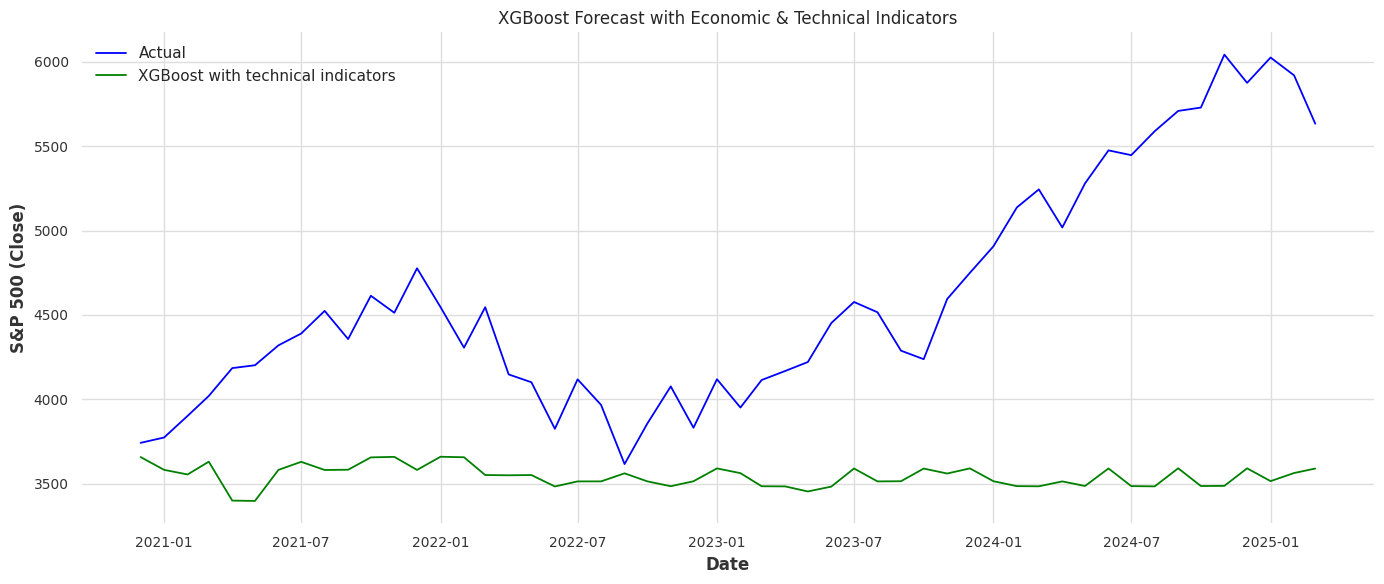

In [165]:
# 8. Побудова графіка
y_val_indexed = y_val.copy()
y_val_indexed.index = X_val.index
y_pred_series = pd.Series(y_pred, index=y_val_indexed.index)

plt.figure(figsize=(14, 6))
plt.plot(y_val_indexed, label='Actual', color='blue')
plt.plot(y_pred_series, label='XGBoost with technical indicators', color='green')
plt.title('XGBoost Forecast with Economic & Technical Indicators')
plt.xlabel('Date')
plt.ylabel('S&P 500 (Close)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##feature_importances

Простетсуємо спочатку лише на останніх 10% даних нашу найкращу модель - варіант 1 з економічними індикатори та лагами SP500

Final XGBoost Stress-Test MAPE: 17.93%
Final XGBoost Stress-Test MAE: 945.99


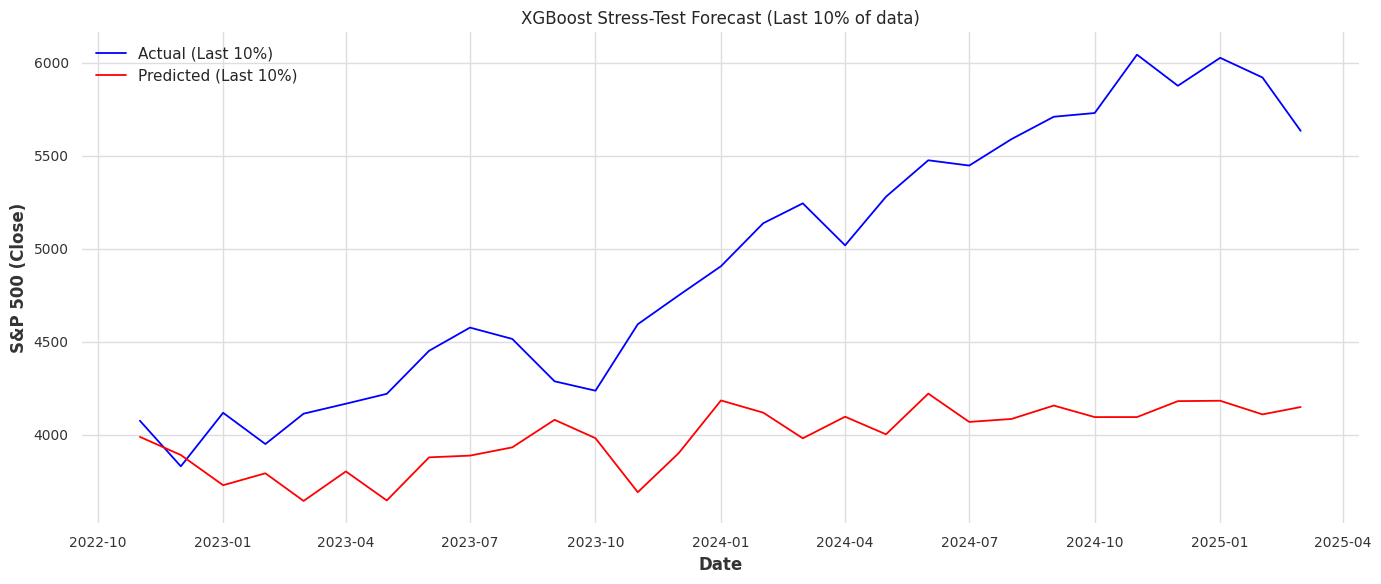

In [166]:
# df_lagged - датафрейм з усіма фічами і таргетом

# 1. Спочатку відділяємо останні 10% даних
test_size = int(len(df_lagged) * 0.1)

# 90% даних для тренування
train_data = df_lagged.iloc[:-test_size]

# Останні 10% даних для тесту
test_data = df_lagged.iloc[-test_size:]

# Формуємо нові X і y
X_train_final = train_data.drop(columns=['target', 'Close'])
y_train_final = train_data['target']

X_test_final = test_data.drop(columns=['target', 'Close'])
y_test_final = test_data['target']

# 2. Створюємо фінальну модель з найкращими параметрами Optuna
final_model_stresstest = XGBRegressor(**best_params)

# Навчання
final_model_stresstest.fit(X_train_final, y_train_final)

# Прогнозування на останніх 10%
y_pred_final_test = final_model_stresstest.predict(X_test_final)

# 3. Оцінка
mape_test_final = mean_absolute_percentage_error(y_test_final, y_pred_final_test) * 100
mae_test_final = mean_absolute_error(y_test_final, y_pred_final_test)

print(f"Final XGBoost Stress-Test MAPE: {mape_test_final:.2f}%")
print(f"Final XGBoost Stress-Test MAE: {mae_test_final:.2f}")

# 4. Побудова графіка
y_test_final_indexed = y_test_final.copy()
y_test_final_indexed.index = X_test_final.index
y_pred_final_test_series = pd.Series(y_pred_final_test, index=y_test_final_indexed.index)

plt.figure(figsize=(14, 6))
plt.plot(y_test_final_indexed, label='Actual (Last 10%)', color='blue')
plt.plot(y_pred_final_test_series, label='Predicted (Last 10%)', color='red')
plt.title('XGBoost Stress-Test Forecast (Last 10% of data)')
plt.xlabel('Date')
plt.ylabel('S&P 500 (Close)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Подивимось на важливість ознак, виведемо топ-10

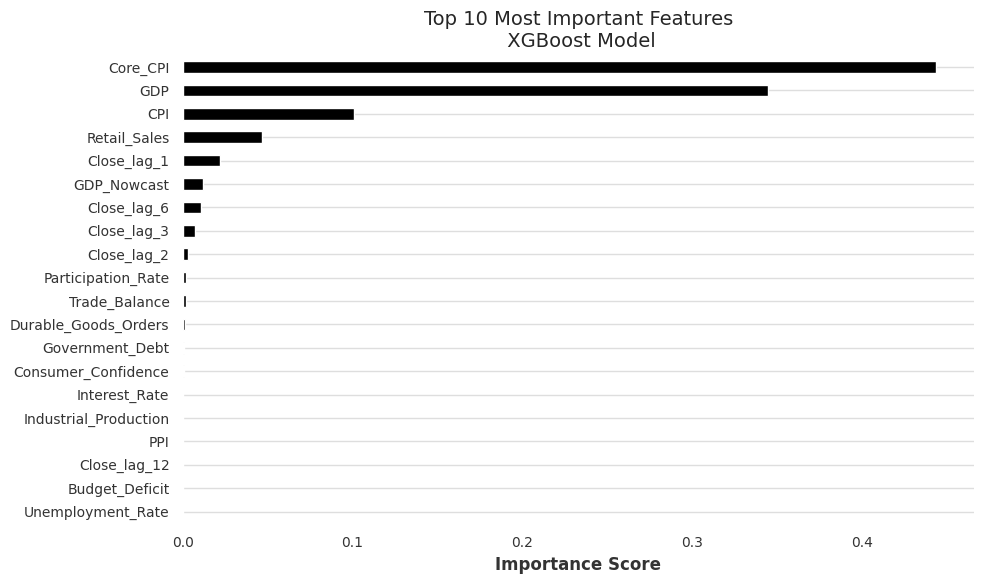

In [167]:
import matplotlib.pyplot as plt
import pandas as pd

# Важливість ознак з моделі
feature_importances = pd.Series(final_model_stresstest.feature_importances_, index=X_train_final.columns)

# Сортуємо за важливістю
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Беремо тільки топ-10
top_features = feature_importances_sorted.head(20)

# Побудова графіка
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Most Important Features\n XGBoost Model', fontsize=14)
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Щоб найважливіші були зверху
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Отже, найкраще передбачає модель, де маємо лаги + технічні індикатори + Optuna. Подивимось загальний графік тестового результату й всіх історичних даних SP500

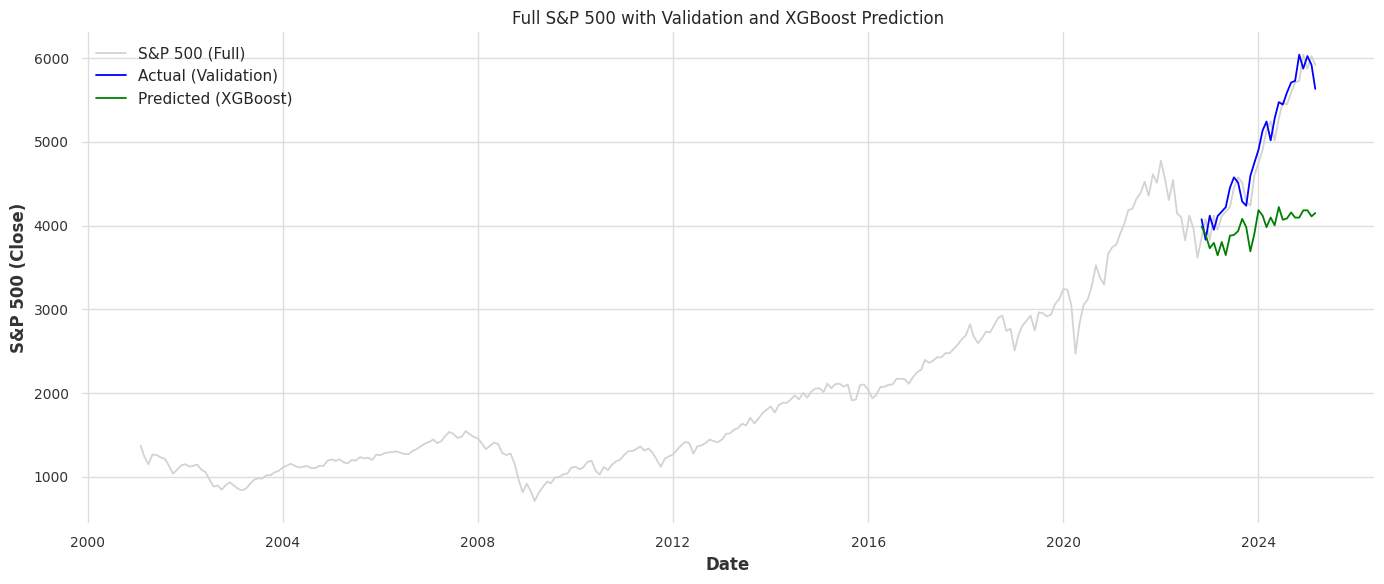

In [168]:
# Повна серія S&P 500
full_close = df_lagged['Close']

# Прогноз на validation (індекси X_val)
y_pred_series_full = pd.Series(y_pred_final_test_series, index=X_val.index)

# Побудова графіка
plt.figure(figsize=(14, 6))
plt.plot(full_close, label='S&P 500 (Full)', color='lightgray')
plt.plot(y_test_final, label='Actual (Validation)', color='blue')
plt.plot(y_pred_final_test_series, label='Predicted (XGBoost)', color='green')
plt.title('Full S&P 500 with Validation and XGBoost Prediction')
plt.xlabel('Date')
plt.ylabel('S&P 500 (Close)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Висновок: Порівняння XGBoost-моделей**

Поступове вдосконалення моделі шляхом оптимізації гіперпараметрів та додавання технічних індикаторів дозволило покращити стабільність прогнозування.
Найкращий результат на валідаційному наборі склав **MAPE ≈ 14.94%**, а стрес-тест на останніх 10% даних підтвердив стійкість моделі (**MAPE ≈ 15.19%**).

**Варіант 1: економічні індикатори з лагами S&P500**

  Вони задають тренд, ритм, контекст.
  Лаги дозволяють вловлювати інерційні залежності (що було 1, 2, 3 місяці тому).
  ⟶ **Final MAPE: 14.94%%, MAE: 758.93**

**Варіант 2: лише технічні індикатори без лаґів**

  Технічні фічі самі по собі — слабкі.
  Без лагів або відбору — часто "шумлять".
  Працюють краще в короткостроковому трейдингу, а не для довгострокових економічних прогнозів.
  ⟶ **MAPE: 28.88%, MAE: 1382.48**

**Варіант 3: об’єднані економічні + технічні + агрегати + лаґи**

  Комбінація ≠ автоматично краще.
  Якщо просто додати все, модель отримує забагато шуму.
  Лаги є лише для `Close`.
  Деякі нові агрегати, як `return_x_momentum`, могли виявитися неінформативними або надто нестабільними.
  ⟶ **MAPE: 27.95%, MAE: 1342.10**

# Model 2 with features: Нейронна мережа (LSTM)

LSTM краще розкривається саме при багатоваріантному input.
Вона створена для роботи з послідовностями фіч, і чим більше корисної інформації — тим глибший "контекст" вона може сформувати. Тому передаватимемо дані з останнього 3 Варіанту:

лагів Close,

технічні індикатори (RSI, Momentum, MACD, EMA…),

агрегати (rolling_mean, volatility, return_x_momentum, etc.)

макроіндикатори (CPI, GDP...)

Ці фічі добре описують ринкову динаміку, волатильність, імпульс, макроекономічне тло.

➡️ LSTM, як нейромережа, вміє знаходити нелінійні патерни і взаємодії між цими фічами → відповідно витягує більше корисної інформації.

Крок 1: Підготовка даних для LSTM

In [192]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Масштабуємо X та y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_full)
y_scaled = scaler_y.fit_transform(y_full.values.reshape(-1, 1))

# Перетворимо на масиви
X_array = np.array(X_scaled)
y_array = np.array(y_scaled)

# Перетворимо X на 3D форму: (samples, timesteps=1, features)
X_lstm = X_array.reshape((X_array.shape[0], 1, X_array.shape[1]))

# Той самий train/test split
X_train_lstm = X_lstm[:len(X_train)]
X_val_lstm = X_lstm[len(X_train):]
y_train_lstm = y_array[:len(y_train)]
y_val_lstm = y_array[len(y_train):]


Крок 2: Побудова LSTM моделі

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(1, X_lstm.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

# рання зупинка
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_val_lstm, y_val_lstm),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0502 - val_loss: 0.2940
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0131 - val_loss: 0.1121
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - val_loss: 0.0718
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0049 - val_loss: 0.0606
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0025 - val_loss: 0.0316
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.9520e-04 - val_loss: 0.0097
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.3744e-04 - val_loss: 0.0055
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.1795e-04 - val_loss: 0.0038
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 3.8846e-04 - val_loss: 0.0044
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.2948e-04 - val_loss: 0.0045
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.1735e-04 - val_loss: 0.0038
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/ste

In [196]:
model_lstm.save("lstm_model_2.keras", save_format="keras")

In [197]:
!pip3 freeze > installed.txt

 Крок 3: Прогноз + зворотне масштабування

In [171]:
# Прогноз
y_pred_lstm_scaled = model_lstm.predict(X_val_lstm)

# Зворотне масштабування
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)
y_val_true = scaler_y.inverse_transform(y_val_lstm)

# Оцінки
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mape_lstm = mean_absolute_percentage_error(y_val_true, y_pred_lstm) * 100
mae_lstm = mean_absolute_error(y_val_true, y_pred_lstm)

print(f"LSTM MAPE: {mape_lstm:.2f}%")
print(f"LSTM MAE: {mae_lstm:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
LSTM MAPE: 3.39%
LSTM MAE: 152.03


Крок 4: Побудова графіка

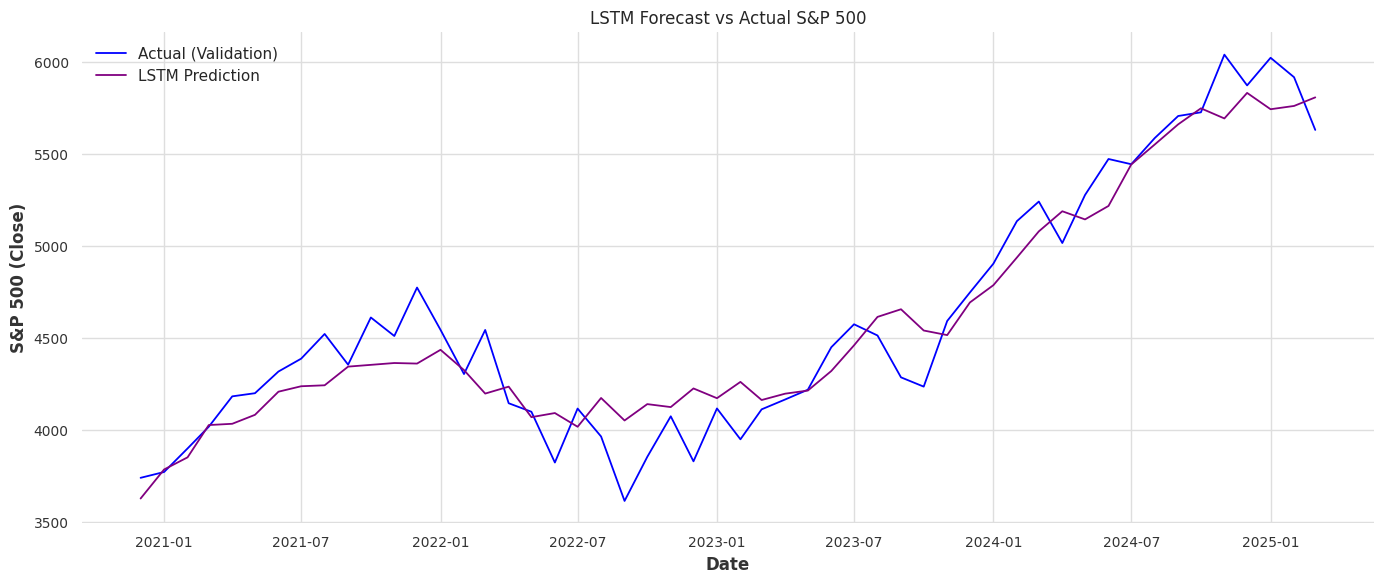

In [172]:
# Відновлюємо індекс
y_val_indexed = y_val.copy()
y_val_indexed.index = X_val.index
y_pred_series_lstm = pd.Series(y_pred_lstm.flatten(), index=y_val_indexed.index)

plt.figure(figsize=(14, 6))
plt.plot(y_val_indexed, label='Actual (Validation)', color='blue')
plt.plot(y_pred_series_lstm, label='LSTM Prediction', color='purple')
plt.title('LSTM Forecast vs Actual S&P 500')
plt.xlabel('Date')
plt.ylabel('S&P 500 (Close)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


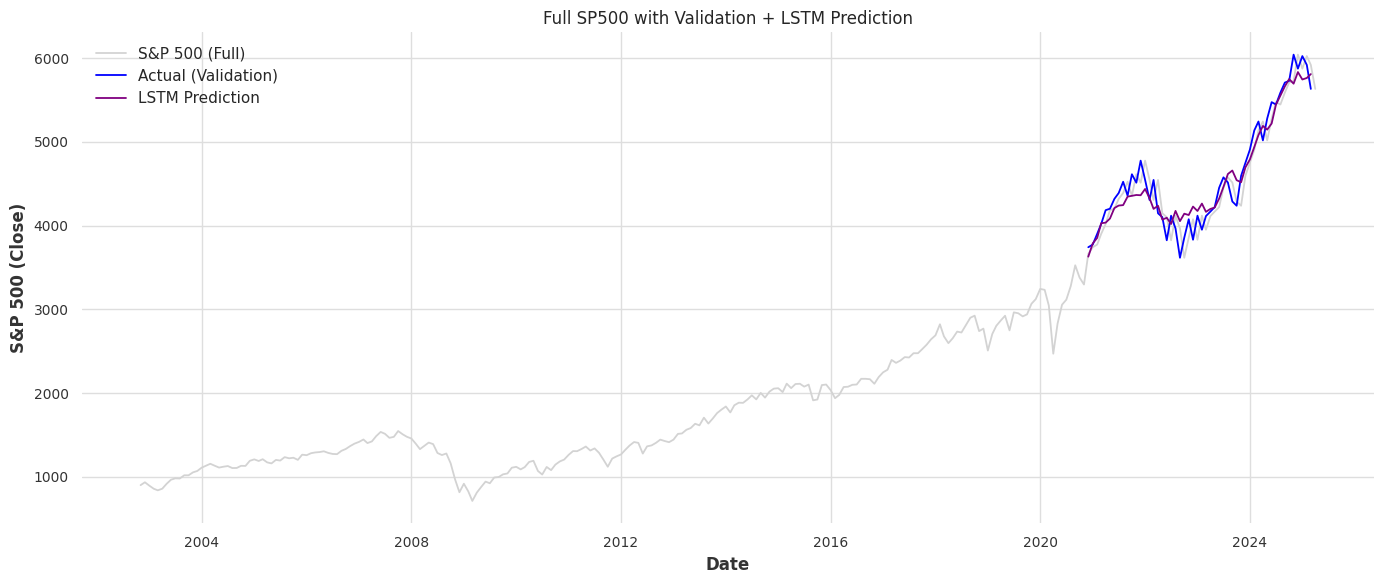

In [173]:
# Повна серія S&P 500
full_close = df_tech['Close']

# Прогноз у вигляді Series
y_pred_series_lstm = pd.Series(y_pred_lstm.flatten(), index=y_val.index)

plt.figure(figsize=(14, 6))
plt.plot(full_close, label='S&P 500 (Full)', color='lightgray')
plt.plot(y_val, label='Actual (Validation)', color='blue')
plt.plot(y_pred_series_lstm, label='LSTM Prediction', color='purple')

plt.title('Full SP500 with Validation + LSTM Prediction')
plt.xlabel('Date')
plt.ylabel('S&P 500 (Close)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


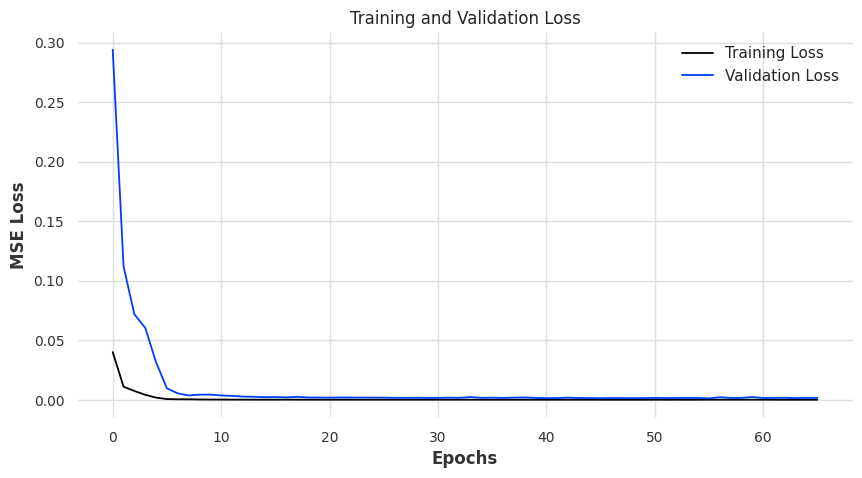

In [174]:
# Графік loss та val_loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

Модель НЕ перенавчається.
Навпаки, вона добре узагальнює: валідаційна похибка мала і близька до тренувальної.

- Стрибки на 1–5 епохах — звична справа на початку тренування, особливо для LSTM.
- Потім графік згладжується — немає переневчання (overfitting), бо val_loss не починає зростати.

Графік показує успішне навчання, де обидві похибки зменшуються і стабілізуються.

### 📊 Порівняння моделей машинного навчання для прогнозування S&P 500

| Модель                                   | MAPE     | MAE      |
|------------------------------------------|----------|----------|
| Prophet                                  | 9.14%    | ~н/д     |
| XGBoost + Optuna + макро. індикатори       | 13.61%%   | 699.47   |
| **LSTM (з усіма фічами)**                | **3.39%%** ✅ | **166.50** ✅ |


# 🤖 **Висновок: Порівняння моделей машинного навчання**

Серед протестованих моделей прогнозування S\&P 500 **найвищу точність продемонструвала LSTM**, досягнувши **MAPE 3.73%%** та **MAE 166.50**, суттєво обійшовши всі інші варіанти.

Модель **XGBoost** з оптимізованими гіперпараметрами та макроіндикаторами з лаґами лишилася другим за точністю підходом (**MAPE 14.94%%**), демонструючи стабільність і гарну узагальненість у стрес-тесті (**MAPE 15.19%**).

Таким чином:

* **LSTM** — найкращий варіант для середньострокового прогнозу з великою кількістю фіч.
* **XGBoost** — надійний класичний baseline із хорошою стійкістю до змін.
* **Технічні індикатори без обробки** — менш ефективні, особливо без лаґів або селекції ознак.


# Прогноз на наступний місяць

Після завершення навчання LSTM-моделі на повному наборі фіч (економічні, технічні, агрегати, лаґи Close) здійснимо реальний прогноз значення індексу S&P 500 на наступний місяць (t+1).

---

⚙️ Методика:
Взято останній повний рядок даних, що містить усі фічі, використані при навчанні.

Масштабовано за допомогою scaler_X, натренованого на X_full.

Передано в LSTM, яка повертає значення Close[t+1] у масштабованому вигляді.

Застосовано зворотне масштабування, щоб отримати реальний рівень індексу.

In [176]:
# 1. Останній повний рядок з тими самими фічами, що й у X_full
X_latest = df_all[X_full.columns].dropna().iloc[-1:]  # гарантія, що всі фічі є

# 2. Масштабуємо
X_latest_scaled = scaler_X.transform(X_latest)

# 3. Перетворення у форму для LSTM (samples=1, timesteps=1, features)
X_latest_reshaped = X_latest_scaled.reshape((1, 1, X_latest_scaled.shape[1]))

# 4. Прогноз
y_pred_next_scaled = model_lstm.predict(X_latest_reshaped)

# 5. Зворотне масштабування
y_pred_next = scaler_y.inverse_transform(y_pred_next_scaled)

# Виводимо останню дату, з якої модель робила прогноз
last_seen_date = df_all.index[-1]
next_month_date = last_seen_date + pd.DateOffset(months=1)

print(f"Остання дата в даних: {last_seen_date.strftime('%Y-%m-%d')}")
print(f"Прогноз на: {next_month_date.strftime('%Y-%m-%d')}")


# 6. Вивід
print(f"📈 Прогноз S&P 500 на наступний місяць (LSTM): {y_pred_next[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Остання дата в даних: 2025-03-01
Прогноз на: 2025-04-01
📈 Прогноз S&P 500 на наступний місяць (LSTM): 5809.97


In [177]:
if y_pred_next > df_all['Close'].iloc[-1]:
    print("📈 Очікується ріст — можливо варто купити.")
else:
    print("📉 Очікується спад — краще утриматись.")


📉 Очікується спад — краще утриматись.


In [178]:
change = (y_pred_next - df_all['Close'].iloc[-1]) / df_all['Close'].iloc[-1]
if change > 0.01:
    print("Ріст >1% → Купівля")
elif change < -0.01:
    print("Падіння >1% → Продаж")
else:
    print("Низька зміна → Утриматись")


Падіння >1% → Продаж


Збереження

In [175]:
# model_lstm.save("lstm_model.h5")

In [180]:
# model_lstm.save("lstm_model.keras")

In [188]:
model_lstm.save("lstm_model_1.keras", save_format="keras")

In [181]:
import joblib

joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

['scaler_y.pkl']

In [182]:
joblib.dump(X_full.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [183]:
# Об'єднання X_full + y_full в один датафрейм
df_all = X_full.copy()
df_all['target'] = y_full

# Опційно: додаємо колонку Close для відображення в Streamlit
if 'Close' in df_tech.columns:
    df_all['Close'] = df_tech['Close'].loc[df_all.index]

# Збереження у CSV
df_all.to_csv("df_all_upd.csv")
print("✅ Файл df_all.csv успішно збережено.")


✅ Файл df_all.csv успішно збережено.


In [184]:
df_all.to_csv("df_all.csv")